# EDA on Sentiment Data


Analyse statement by Loughran and McDonald dictionary

In [2]:
%config InlineBackend.figure_format='retina'
import logging
from ekorpkit import eKonf

logging.basicConfig(level=logging.WARNING)
print("version:", eKonf.__version__)
print("is notebook?", eKonf.is_notebook())
print("is colab?", eKonf.is_colab())
print("evironment varialbles:")
eKonf.print(eKonf.env().dict())

version: 0.1.33+27.g5c22afc.dirty
is notebook? True
is colab? False
evironment varialbles:
{'EKORPKIT_CONFIG_DIR': '/workspace/projects/ekorpkit-book/config',
 'EKORPKIT_DATA_DIR': None,
 'EKORPKIT_PROJECT': 'ekorpkit-book',
 'EKORPKIT_WORKSPACE_ROOT': '/workspace',
 'NUM_WORKERS': 230}


In [3]:
start_year = 2000
data_dir = "../data/fomc"
eKonf.env().FRED_API_KEY

pydantic.types.SecretStr

## Load datasets

In [4]:
data_recent = eKonf.load_data('fomc_sentiment_data_recent.parquet', data_dir)
data_recent

polarity_mean_beigebook  polarity_mean_meeting_script  \
recent_meeting                                                          
1990-02-07                          NaN                     -0.087583   
1990-03-27                          NaN                     -0.171992   
1990-05-15                          NaN                     -0.116052   
1990-07-03                          NaN                     -0.114829   
1990-08-21                          NaN                     -0.209552   
...                                 ...                           ...   
2021-06-16                     0.011743                           NaN   
2021-07-28                    -0.120547                           NaN   
2021-09-22                    -0.074328                           NaN   
2021-11-03                    -0.046022                           NaN   
2021-12-15                          NaN                           NaN   

                polarity_mean_minutes  polarity_mean_press_conf  \
recent_meeting                                                    
1990-02-07                        NaN                       NaN   
1990-03-27                        NaN                       NaN   
1990-05-15                        NaN                       NaN   
1990-07-03                        NaN                       NaN   
1990-08-21                        NaN                       NaN   
...                               ...                       ...   
2021-06-16                   0.041638                 -0.017544   
2021-07-28                  -0.043969                  0.021318   
2021-09-22                  -0.079199                 -0.087292   
2021-11-03                  -0.064255                 -0.089881   
2021-12-15                  -0.043929                 -0.075441   

                polarity_mean_speech  polarity_mean_statement  \
recent_meeting                                                  
1990-02-07                       NaN                      NaN   
1990-03-27                       NaN                      NaN   
1990-05-15                       NaN                      NaN   
1990-07-03                       NaN                      NaN   
1990-08-21                       NaN                      NaN   
...                              ...                      ...   
2021-06-16                 -0.031786                 0.435897   
2021-07-28                 -0.042941                 0.461538   
2021-09-22                 -0.133837                 0.476190   
2021-11-03                 -0.030345                 0.215686   
2021-12-15                 -0.356613                 0.166667   

                polarity_mean_testimony  polarity_diffusion_beigebook  \
recent_meeting                                                          
1990-02-07                          NaN                           NaN   
1990-03-27                          NaN                           NaN   
1990-05-15                          NaN                           NaN   
1990-07-03                          NaN                           NaN   
1990-08-21                          NaN                           NaN   
...                                 ...                           ...   
2021-06-16                     0.235955                      0.012195   
2021-07-28                          NaN                     -0.134921   
2021-09-22                     0.031746                     -0.075712   
2021-11-03                    -0.120000                     -0.048109   
2021-12-15                          NaN                           NaN   

                polarity_diffusion_meeting_script  polarity_diffusion_minutes  \
recent_meeting                                                                  
1990-02-07                              -0.095663                         NaN   
1990-03-27                              -0.179702                         NaN   
1990-05-15                              -0.125461                         

In [6]:
data_next = eKonf.load_data('fomc_sentiment_data_next.parquet', data_dir)
data_next

polarity_mean_beigebook  polarity_mean_meeting_script  \
next_meeting                                                          
1990-03-27                        NaN                     -0.087583   
1990-04-11                        NaN                     -0.171992   
1990-07-03                        NaN                     -0.116052   
1990-08-21                        NaN                     -0.114829   
1990-09-07                        NaN                     -0.209552   
...                               ...                           ...   
2021-07-28                   0.011743                           NaN   
2021-09-22                  -0.120547                           NaN   
2021-11-03                  -0.074328                           NaN   
2021-12-15                  -0.046022                           NaN   
2022-01-26                        NaN                           NaN   

              polarity_mean_minutes  polarity_mean_press_conf  \
next_meeting                                                    
1990-03-27                      NaN                       NaN   
1990-04-11                      NaN                       NaN   
1990-07-03                      NaN                       NaN   
1990-08-21                      NaN                       NaN   
1990-09-07                      NaN                       NaN   
...                             ...                       ...   
2021-07-28                 0.041638                 -0.017544   
2021-09-22                -0.043969                  0.021318   
2021-11-03                -0.079199                 -0.087292   
2021-12-15                -0.064255                 -0.089881   
2022-01-26                -0.043929                 -0.075441   

              polarity_mean_speech  polarity_mean_statement  \
next_meeting                                                  
1990-03-27                     NaN                      NaN   
1990-04-11                     NaN                      NaN   
1990-07-03                     NaN                      NaN   
1990-08-21                     NaN                      NaN   
1990-09-07                     NaN                      NaN   
...                            ...                      ...   
2021-07-28               -0.031786                 0.435897   
2021-09-22               -0.042941                 0.461538   
2021-11-03               -0.133837                 0.476190   
2021-12-15               -0.030345                 0.215686   
2022-01-26               -0.356613                 0.166667   

              polarity_mean_testimony  polarity_diffusion_beigebook  \
next_meeting                                                          
1990-03-27                        NaN                           NaN   
1990-04-11                        NaN                           NaN   
1990-07-03                        NaN                           NaN   
1990-08-21                        NaN                           NaN   
1990-09-07                        NaN                           NaN   
...                               ...                           ...   
2021-07-28                   0.235955                      0.012195   
2021-09-22                        NaN                     -0.134921   
2021-11-03                   0.031746                     -0.075712   
2021-12-15                  -0.120000                     -0.048109   
2022-01-26                        NaN                           NaN   

              polarity_diffusion_meeting_script  polarity_diffusion_minutes  \
next_meeting                                                                  
1990-03-27                            -0.095663                         NaN   
1990-04-11                            -0.179702                         NaN   
1990-07-03                            -0.125461                         NaN   
1990-08-21                            -0.117794                         NaN   
1990-09-07                

In [7]:
finbert_next = eKonf.load_data('fomc_sentiment_finbert_next.parquet', data_dir)

cols = [
    'polarity_mean_minutes', 'polarity_mean_press_conf', 'polarity_mean_speech', 'polarity_mean_statement',
    'polarity_diffusion_minutes', 'polarity_diffusion_press_conf', 'polarity_diffusion_speech', 'polarity_diffusion_statement',
]

finbert_tone_next =  finbert_next[cols].copy()
finbert_tone_next.columns = finbert_tone_next.columns.str.replace('polarity', 'finbert')
finbert_tone_next

finbert_mean_minutes  finbert_mean_press_conf  \
next_meeting                                                  
1990-03-27                     NaN                      NaN   
1990-04-11                     NaN                      NaN   
1990-07-03                     NaN                      NaN   
1990-08-21                     NaN                      NaN   
1990-09-07                     NaN                      NaN   
...                            ...                      ...   
2021-07-28                0.484200                 0.291998   
2021-09-22                0.465281                 0.278891   
2021-11-03                0.499861                 0.222723   
2021-12-15                0.529321                 0.251157   
2022-01-26                0.509806                 0.280516   

              finbert_mean_speech  finbert_mean_statement  \
next_meeting                                                
1990-03-27                    NaN                     NaN   
1990-04-11                    NaN                     NaN   
1990-07-03                    NaN                     NaN   
1990-08-21                    NaN                     NaN   
1990-09-07                    NaN                     NaN   
...                           ...                     ...   
2021-07-28               0.189272                0.376550   
2021-09-22               0.294276                0.429236   
2021-11-03               0.339912                0.448015   
2021-12-15               0.283788                0.495847   
2022-01-26               0.408242                0.412947   

              finbert_diffusion_minutes  finbert_diffusion_press_conf  \
next_meeting                                                            
1990-03-27                          NaN                           NaN   
1990-04-11                          NaN                           NaN   
1990-07-03                          NaN                           NaN   
1990-08-21                          NaN                           NaN   
1990-09-07                          NaN                           NaN   
...                                 ...                           ...   
2021-07-28                     0.640138                      0.386842   
2021-09-22                     0.611842                      0.369186   
2021-11-03                     0.651163                      0.299120   
2021-12-15                     0.706383                      0.333333   
2022-01-26                     0.675000                      0.377622   

              finbert_diffusion_speech  finbert_diffusion_statement  
next_meeting                                                         
1990-03-27                         NaN                          NaN  
1990-04-11                         NaN                          NaN  
1990-07-03                         NaN                          NaN  
1990-08-21                         NaN                          NaN  
1990-09-07                         NaN                          NaN  
...                                ...                          ...  
2021-07-28                    0.257384                     0.461538  
2021-09-22                    0.392936                     0.538462  
2021-11-03                    0.449905                     0.571429  
2021-12-15                    0.378676                     0.647059  
2022-01-26                    0.547619                     0.555556  

[286 rows x 8 columns]

In [8]:
t5_next = eKonf.load_data('fomc_sentiment_t5_next.parquet', data_dir)

cols = [
    'polarity_diffusion_minutes', 'polarity_diffusion_press_conf', 'polarity_diffusion_speech', 'polarity_diffusion_statement',
]

t5_tone_next =  t5_next[cols].copy()
t5_tone_next.columns = t5_tone_next.columns.str.replace('polarity', 't5')
t5_tone_next

t5_diffusion_minutes  t5_diffusion_press_conf  \
next_meeting                                                  
1990-03-27                     NaN                      NaN   
1990-04-11                     NaN                      NaN   
1990-07-03                     NaN                      NaN   
1990-08-21                     NaN                      NaN   
1990-09-07                     NaN                      NaN   
...                            ...                      ...   
2021-07-28                0.456747                 0.194737   
2021-09-22                0.414474                 0.197674   
2021-11-03                0.395349                 0.143695   
2021-12-15                0.476596                 0.172619   
2022-01-26                0.403571                 0.216783   

              t5_diffusion_speech  t5_diffusion_statement  
next_meeting                                               
1990-03-27                    NaN                     NaN  
1990-04-11                    NaN                     NaN  
1990-07-03                    NaN                     NaN  
1990-08-21                    NaN                     NaN  
1990-09-07                    NaN                     NaN  
...                           ...                     ...  
2021-07-28               0.219409                0.615385  
2021-09-22               0.227373                0.538462  
2021-11-03               0.234405                0.571429  
2021-12-15               0.209559                0.705882  
2022-01-26               0.174603                0.444444  

[286 rows x 4 columns]

## Correlation

In [9]:
cfg = eKonf.compose("io/fetcher/fomc")
cfg.output_dir = data_dir
fomc = eKonf.instantiate(cfg)

In [10]:
fomc.load_calendar(from_year=1982, force_download=False)

unscheduled  forecast  confcall        speaker  rate  rate_change  \
date                                                                            
1982-10-05        False     False     False   Paul Volcker  9.50        -0.50   
1982-11-16        False     False     False   Paul Volcker  9.00        -0.50   
1982-12-21        False     False     False   Paul Volcker  8.50         0.00   
1983-01-14        False     False      True   Paul Volcker  8.50         0.00   
1983-01-21        False     False      True   Paul Volcker  8.50         0.00   
...                 ...       ...       ...            ...   ...          ...   
2021-11-03        False     False     False  Jerome Powell  0.25         0.00   
2021-12-15        False      True     False  Jerome Powell  0.25         0.00   
2022-01-26        False     False     False  Jerome Powell  0.25         0.00   
2022-03-16        False      True     False  Jerome Powell  0.50         0.25   
2022-05-04        False     False     False  Jerome Powell  1.00         0.50   

            rate_decision  rate_changed  
date                                     
1982-10-05           -1.0             1  
1982-11-16           -1.0             1  
1982-12-21            0.0             0  
1983-01-14            0.0             0  
1983-01-21            0.0             0  
...                   ...           ...  
2021-11-03            0.0             0  
2021-12-15            0.0             0  
2022-01-26            0.0             0  
2022-03-16            1.0             1  
2022-05-04            1.0             1  

[415 rows x 8 columns]

### Merge with fed rate data

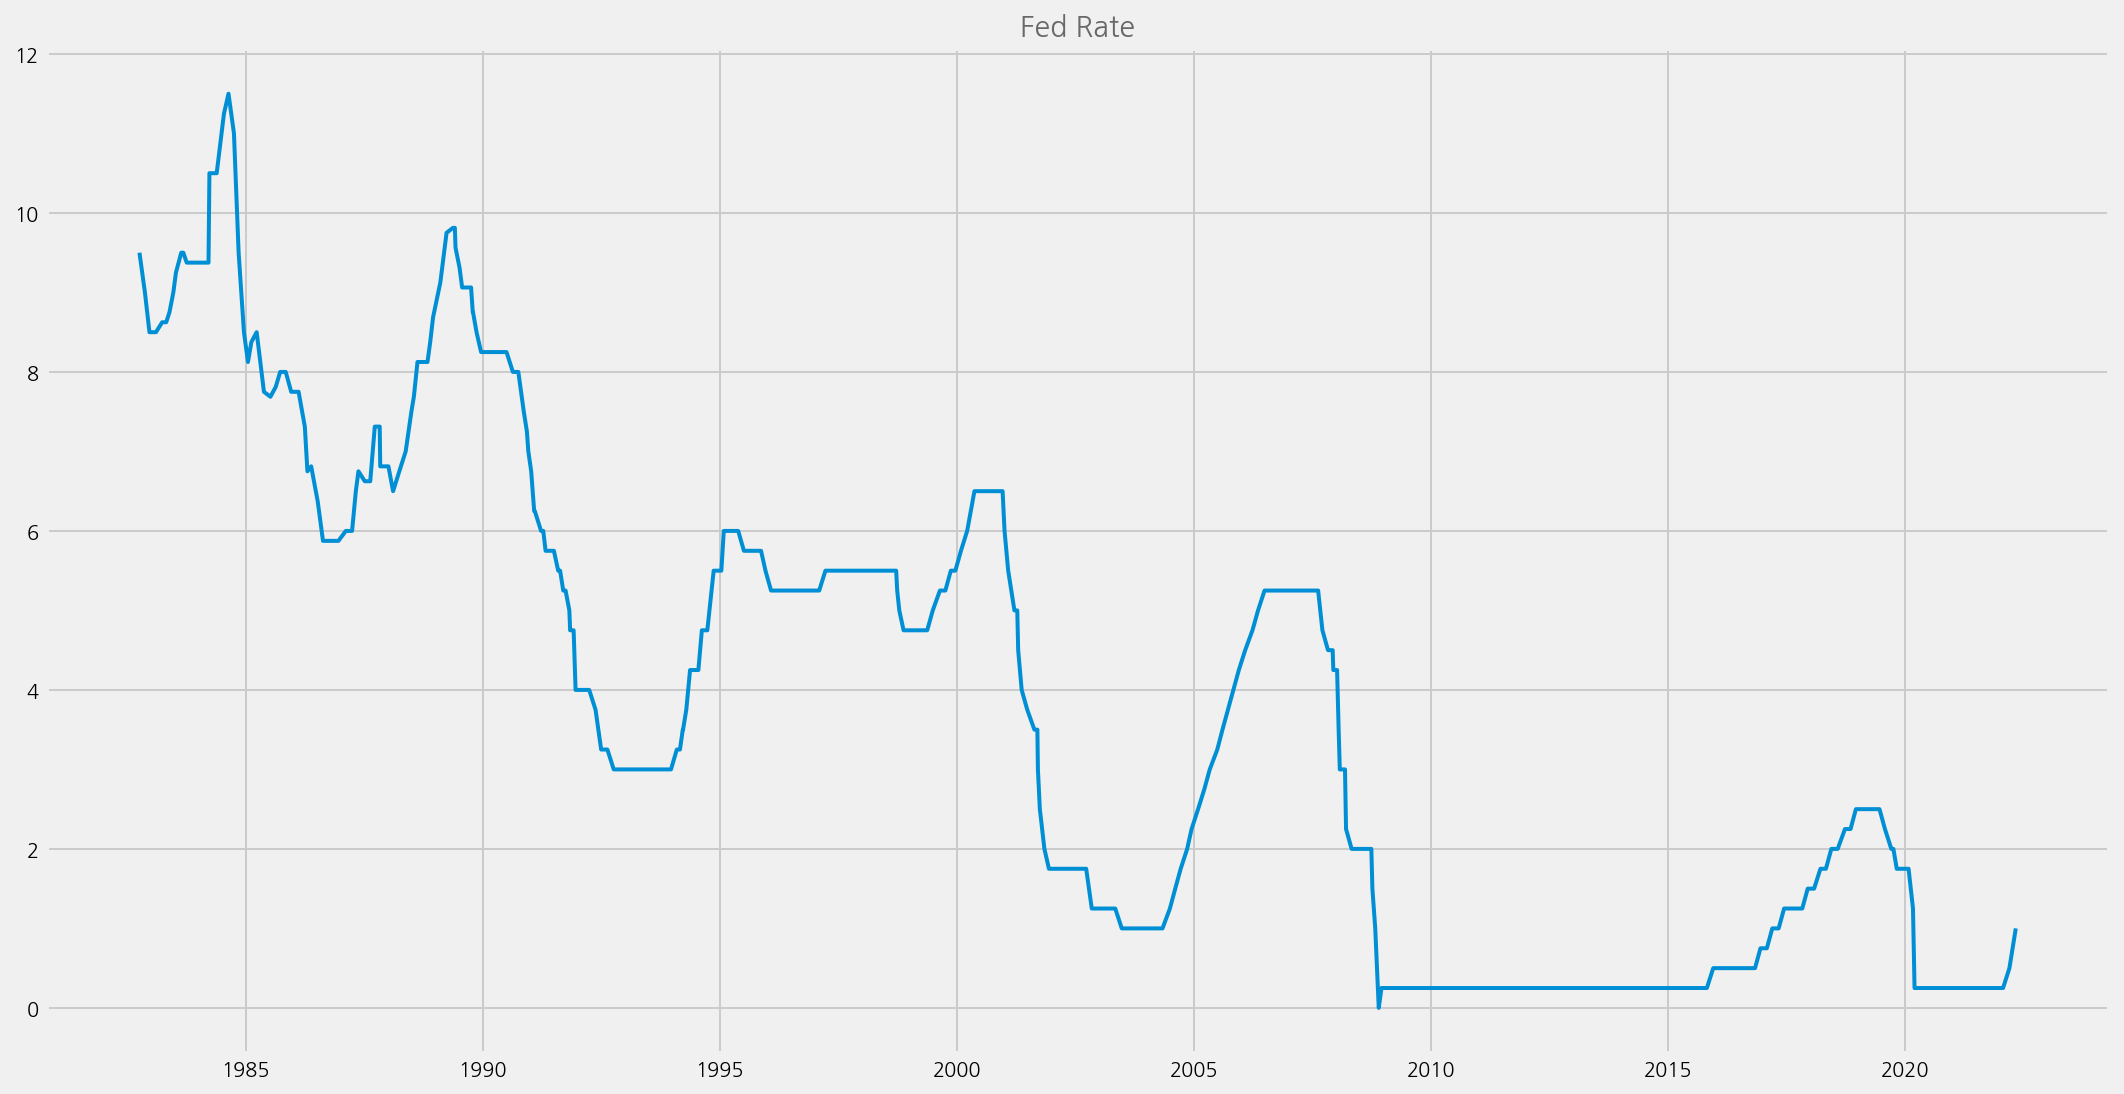

In [11]:
cfg = eKonf.compose('visualize/plot=lineplot')
cfg.plot.y = 'rate'
cfg.figure.figsize = (15, 8)
cfg.ax.title = 'Fed Rate'
eKonf.instantiate(cfg, data=fomc.calendar)

In [12]:
merged_data_recent = data_recent.merge(fomc.calendar, left_index=True, right_index=True)
merged_data_recent.index.name = 'timestamp'
merged_data_recent = merged_data_recent[merged_data_recent.index.year >= start_year]

merged_data_next = data_next.merge(fomc.calendar, left_index=True, right_index=True)
merged_data_next = merged_data_next.merge(finbert_tone_next, left_index=True, right_index=True)
merged_data_next = merged_data_next.merge(t5_tone_next, left_index=True, right_index=True)
merged_data_next.index.name = 'timestamp'
merged_data_next = merged_data_next[merged_data_next.index.year >= start_year]

In [15]:
corr_columns = [
    'polarity_mean_minutes', 'polarity_mean_press_conf', 'polarity_mean_speech', 'polarity_mean_statement',
    'polarity_diffusion_minutes', 'polarity_diffusion_press_conf', 'polarity_diffusion_speech', 'polarity_diffusion_statement',
    "rate", "rate_change"
]

corr_data_recent = merged_data_recent[corr_columns].astype(float).corr()
corr_data_next = merged_data_next[corr_columns].astype(float).corr()


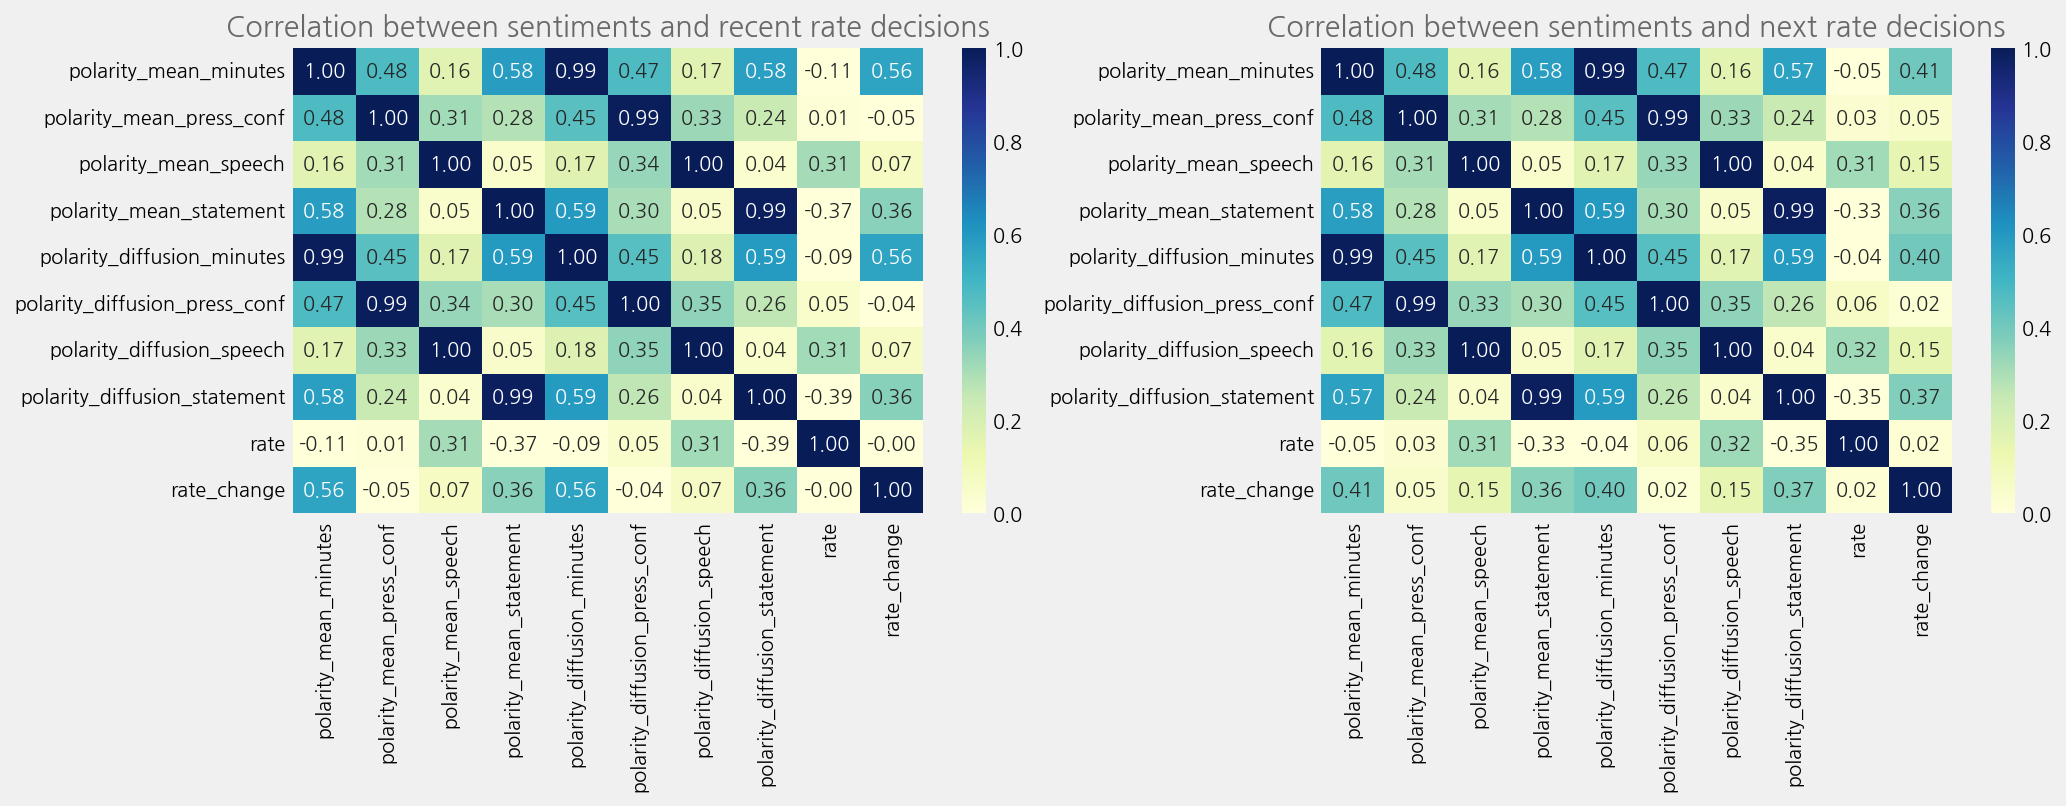

In [16]:
cfg = eKonf.compose("visualize/plot=heatmap")
cfg.figure.figsize = (15, 6)
cfg.subplots.ncols = 2
cfg.subplots.nrows = 1
cfg.heatmap.axno = 0
cfg.heatmap.datano = 0
cfg.heatmap.cmap = "YlGnBu"
cfg.heatmap.vmin = 0
cfg.heatmap.vmax = 1
cfg.heatmap.fmt = ".2f"
cfg.ax.title = "Correlation between sentiments and recent rate decisions"
cfg.ax.axno = 0
heatmap2 = cfg.heatmap.copy()
heatmap2.axno = 1
heatmap2.datano = 1
ax2 = cfg.ax.copy()
ax2.title = "Correlation between sentiments and next rate decisions"
ax2.axno = 1
cfg.plots.append(heatmap2)
cfg.axes.append(ax2)
eKonf.instantiate(cfg, data=[corr_data_recent, corr_data_next])

In [17]:
corr_columns = [
    'polarity_diffusion_minutes', 'polarity_diffusion_press_conf', 'polarity_diffusion_speech', 'polarity_diffusion_statement',
    'finbert_diffusion_minutes', 'finbert_diffusion_press_conf', 'finbert_diffusion_speech', 'finbert_diffusion_statement',
    't5_diffusion_minutes', 't5_diffusion_press_conf', 't5_diffusion_speech', 't5_diffusion_statement',
    "rate", "rate_change"
]

corr_data_next = merged_data_next[corr_columns].astype(float).corr()

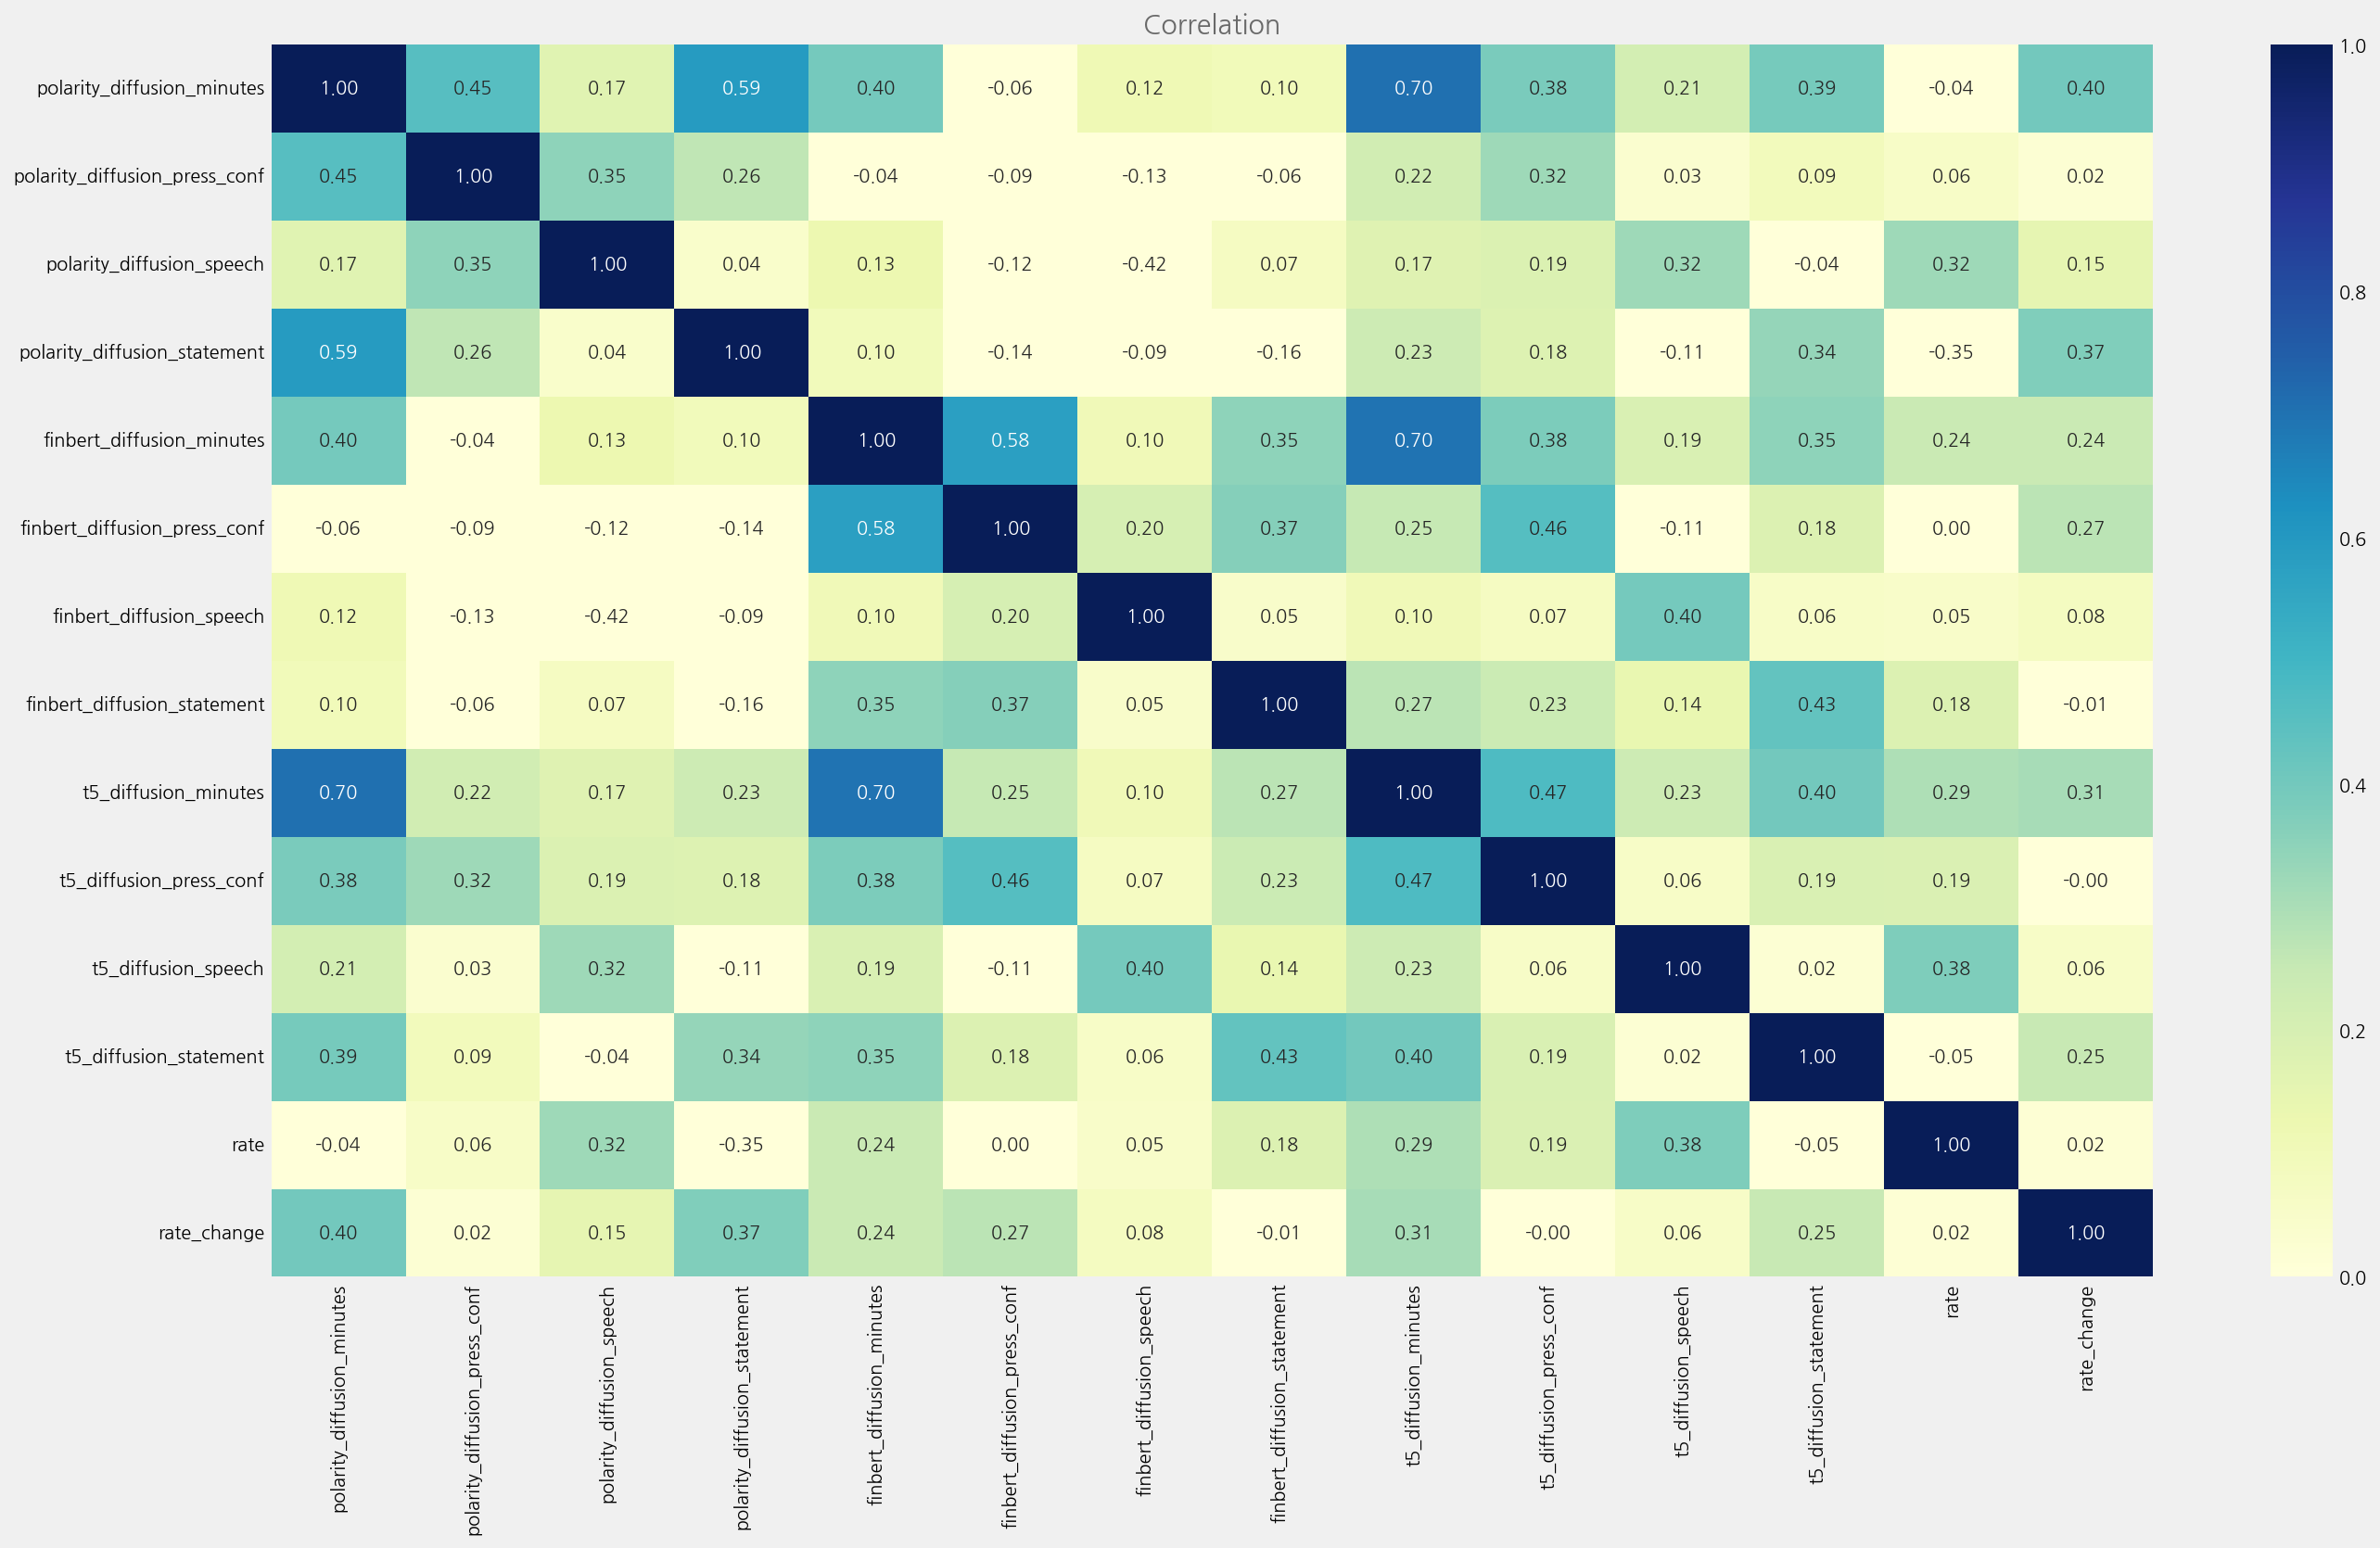

In [18]:
cfg = eKonf.compose("visualize/plot=heatmap")
cfg.figure.figsize = (20, 12)
cfg.heatmap.cmap = "YlGnBu"
cfg.heatmap.vmin = 0
cfg.heatmap.vmax = 1
cfg.heatmap.fmt = ".2f"
cfg.ax.title = "Correlation"
eKonf.instantiate(cfg, data=corr_data_next)

## Plot the sentiment scores

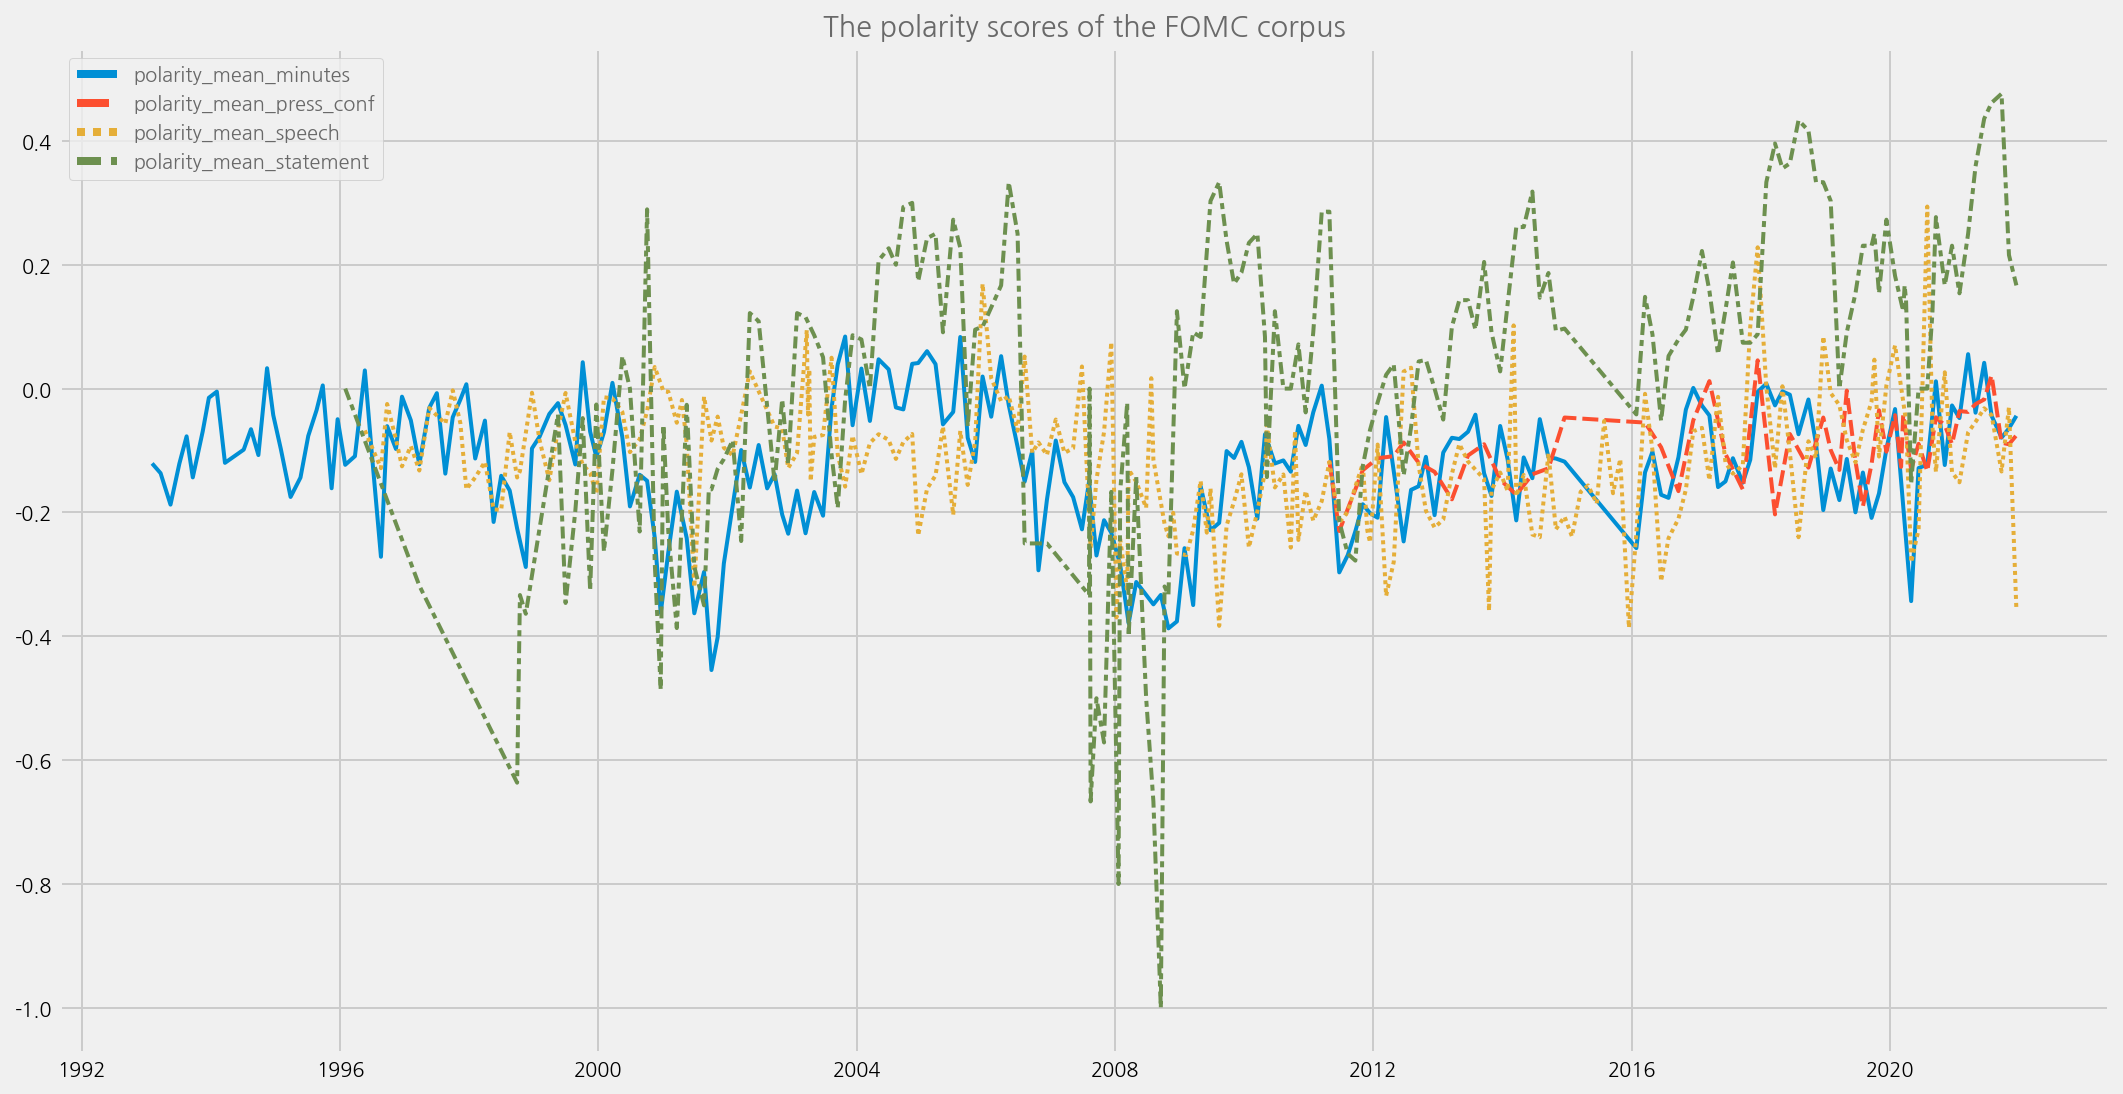

In [19]:
cfg = eKonf.compose('visualize/plot=lineplot')
cfg.plot.y = ['polarity_mean_minutes', 'polarity_mean_press_conf', 'polarity_mean_speech', 'polarity_mean_statement']
cfg.figure.figsize = '(15, 8)'
cfg.ax.title = 'The polarity scores of the FOMC corpus'
eKonf.instantiate(cfg, data=data_recent)

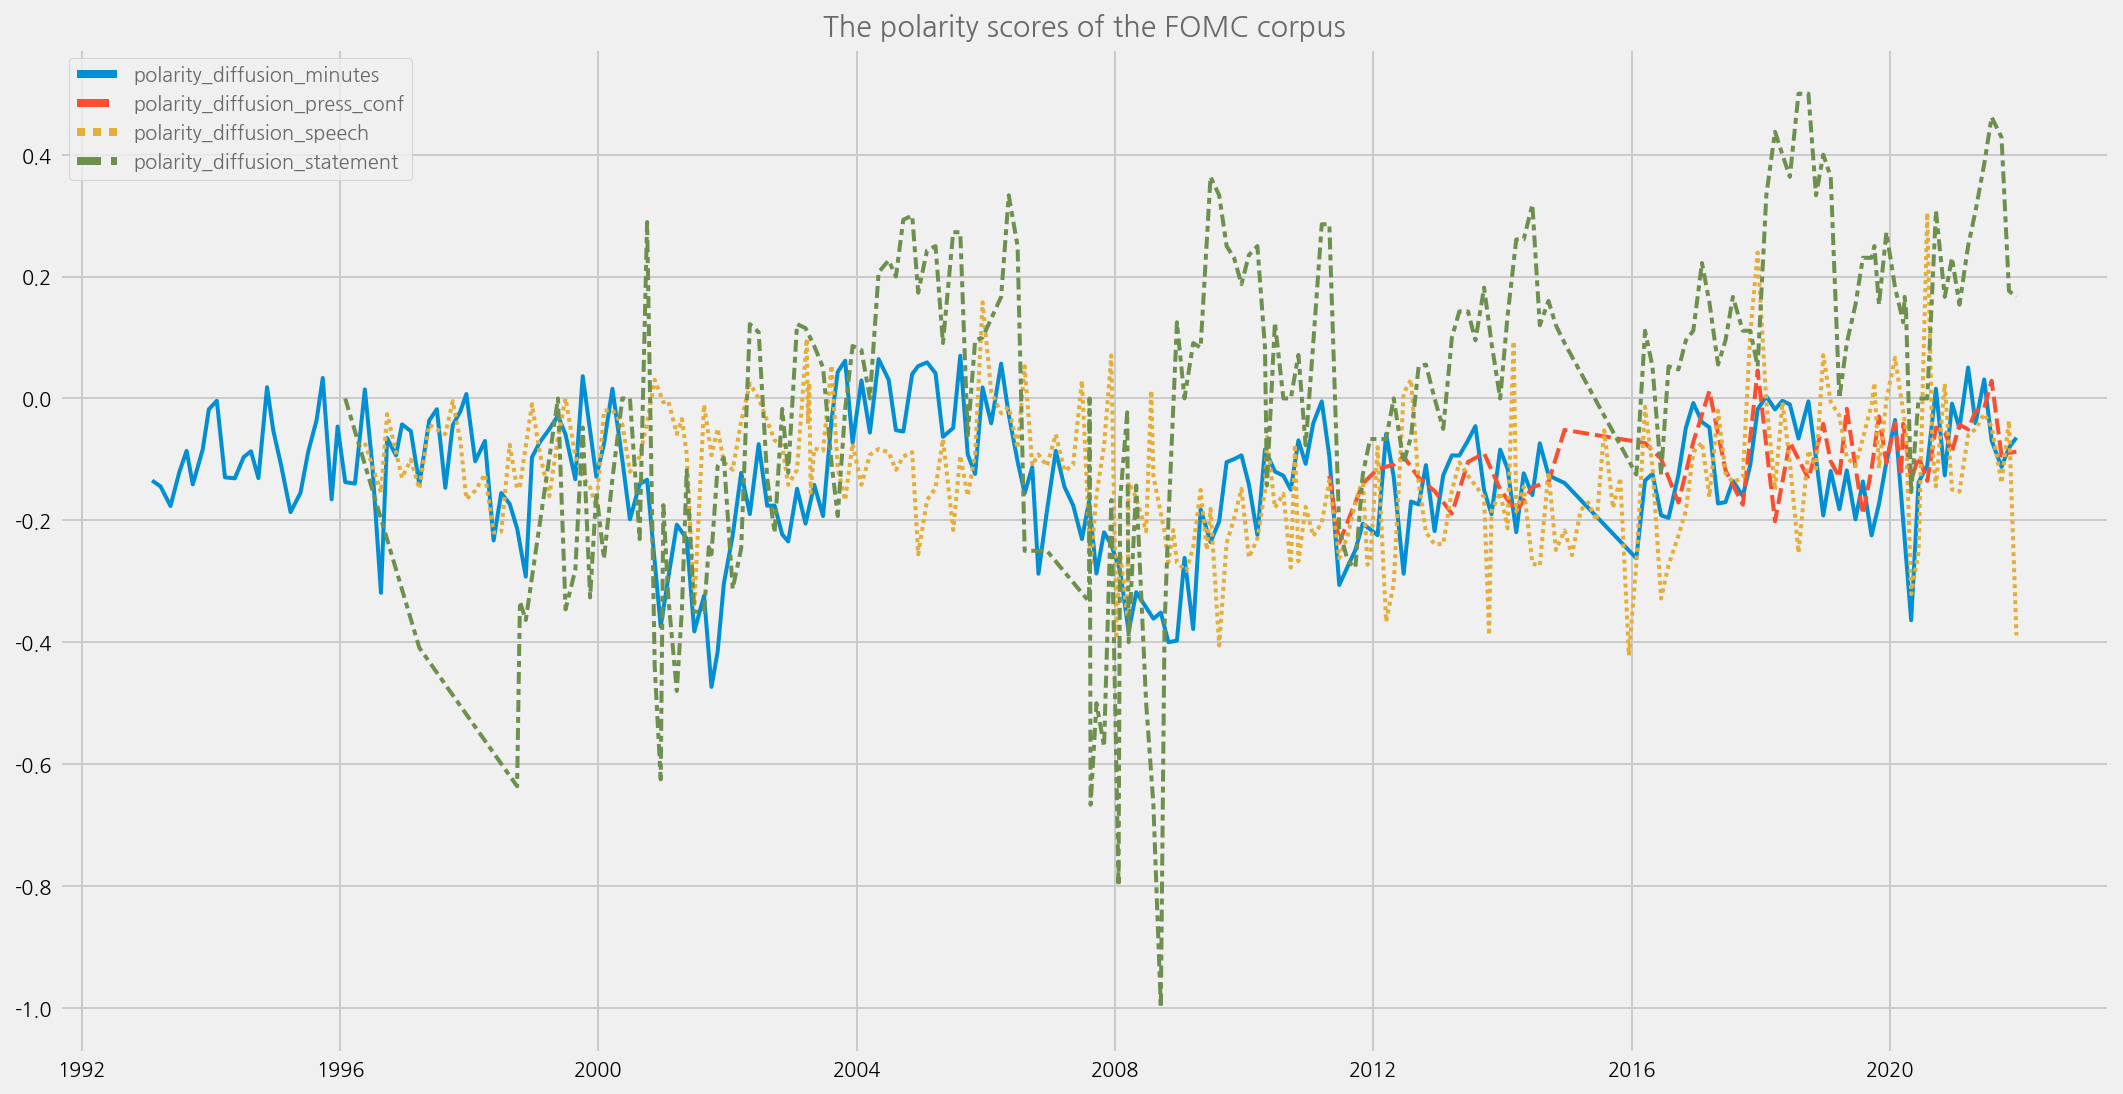

In [20]:
cfg = eKonf.compose('visualize/plot=lineplot')
cfg.plot.y = ['polarity_diffusion_minutes', 'polarity_diffusion_press_conf', 'polarity_diffusion_speech', 'polarity_diffusion_statement']
cfg.figure.figsize = '(15, 8)'
cfg.ax.title = 'The polarity scores of the FOMC corpus'
eKonf.instantiate(cfg, data=data_recent)

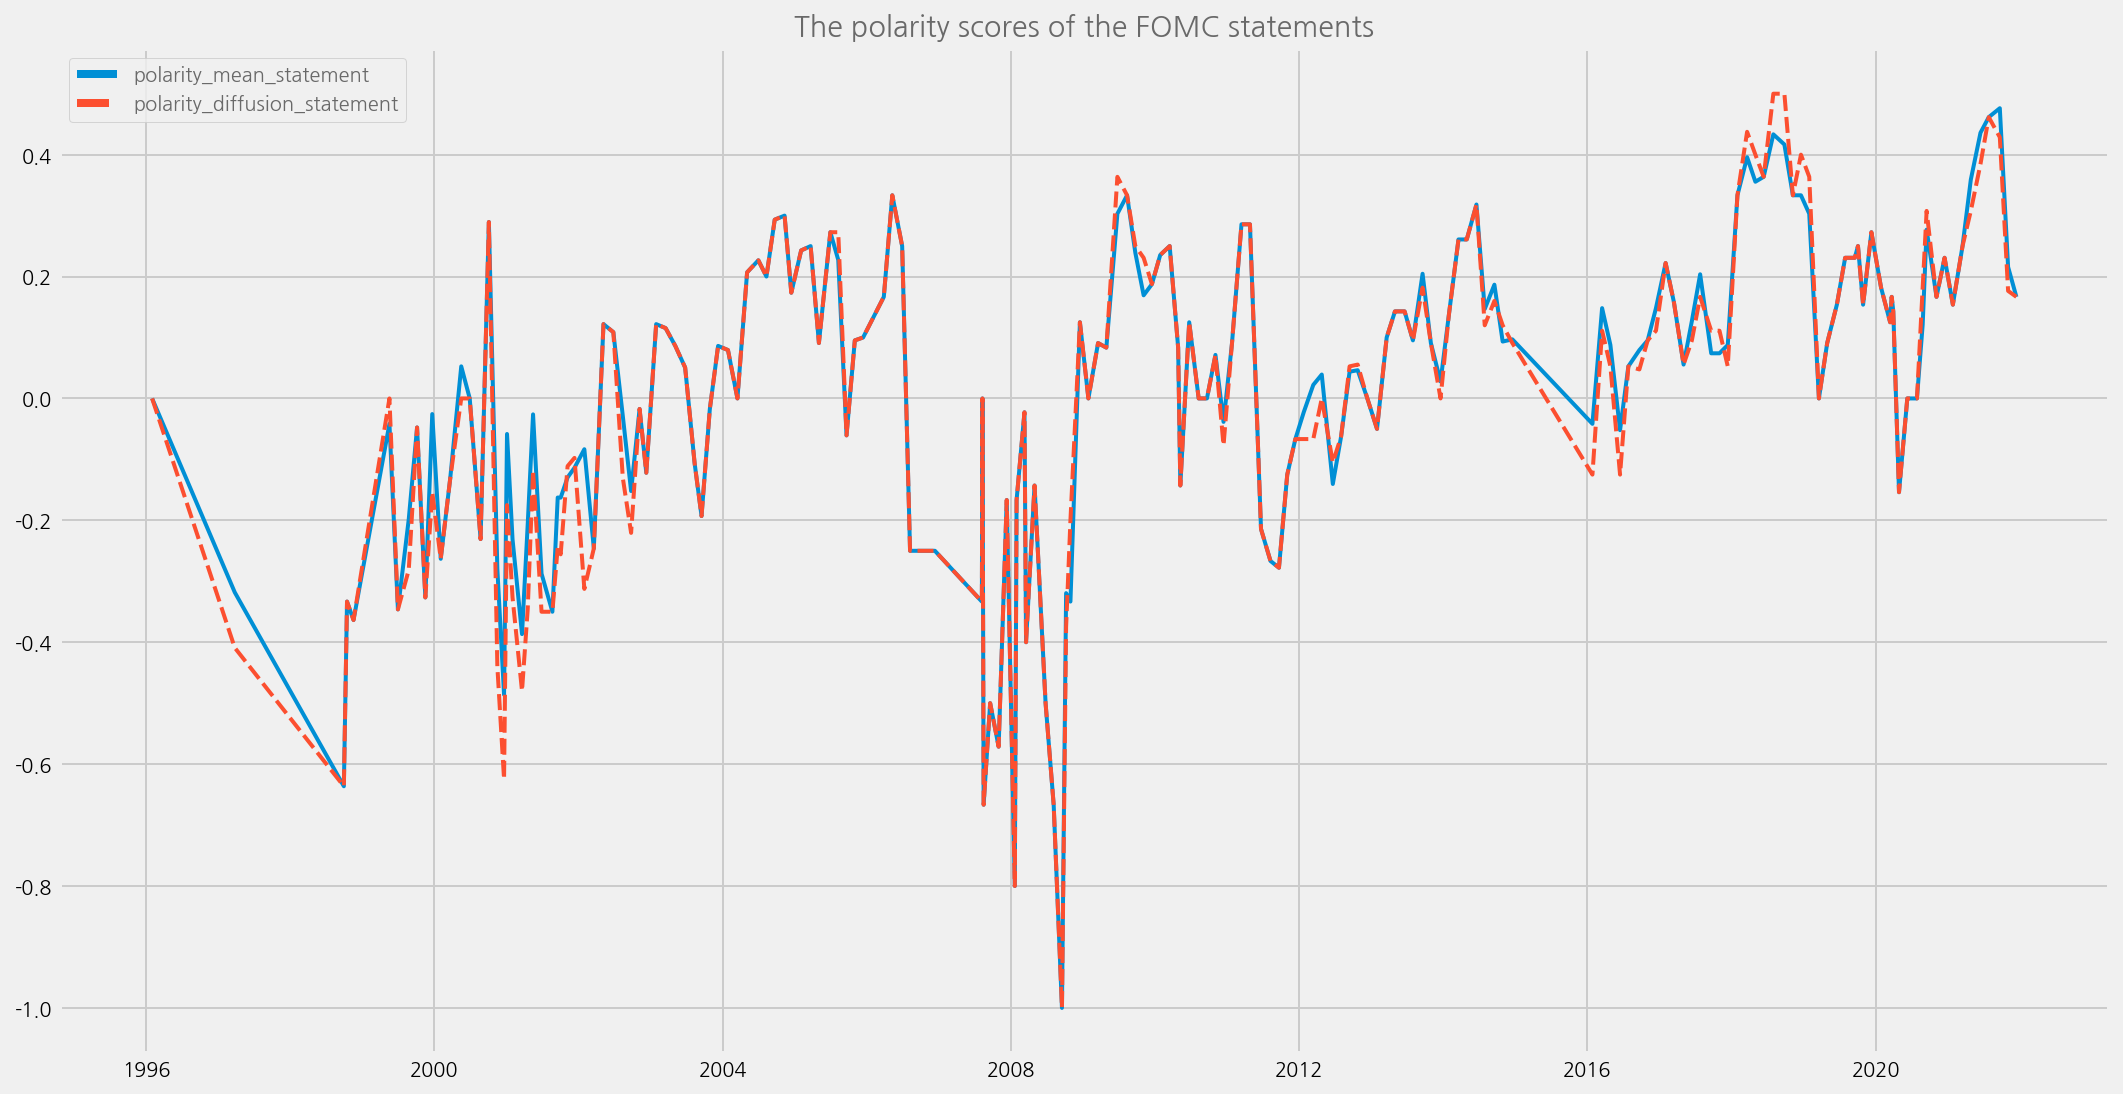

In [21]:
cfg = eKonf.compose('visualize/plot=lineplot')
cfg.plot.y = ['polarity_mean_statement', 'polarity_diffusion_statement']
cfg.figure.figsize = '(15, 8)'
cfg.ax.title = 'The polarity scores of the FOMC statements'
eKonf.instantiate(cfg, data=data_recent)

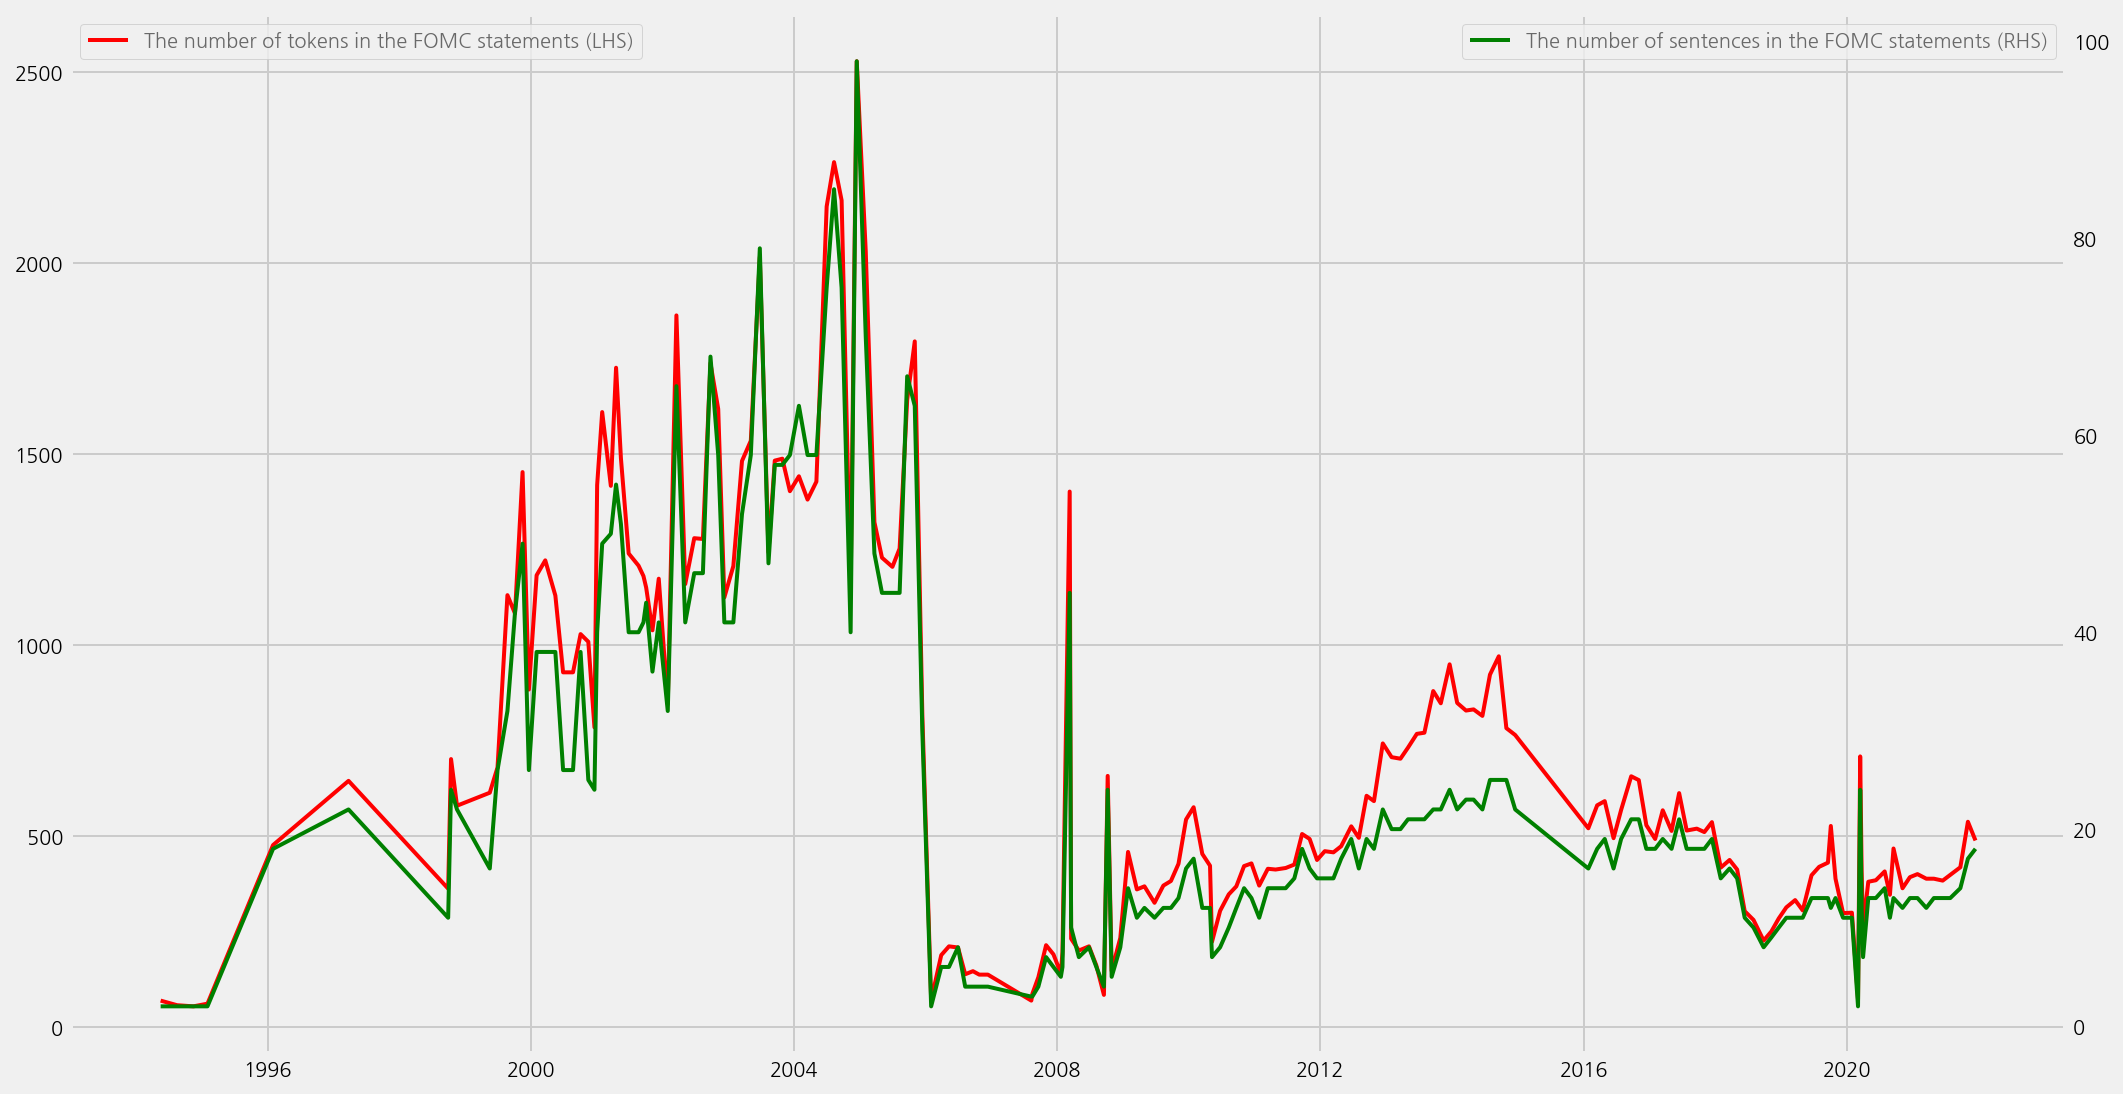

In [22]:
cfg = eKonf.compose('visualize/plot=lineplot')
cfg.figure.figsize = (15, 8)
cfg.plots.append(cfg.plot.copy())
cfg.plots[0].y = "num_tokens_sum_statement"
cfg.plots[0].rcParams = dict(linewidth=2.5, color="red")
cfg.plots[1].y = "num_examples_statement"
cfg.plots[1].rcParams = dict(linewidth=1.5, color="green")
cfg.plots[1].secondary_y = True
cfg.ax.legend = dict(
    labels=[
        "The number of tokens in the FOMC statements (LHS)",
    ],
    loc=2,
)
ax2 = cfg.ax.copy()
ax2.grid = False
ax2.secondary_y = True
ax2.legend = dict(
    labels=["The number of sentences in the FOMC statements (RHS)"],
    loc=1,
)
cfg.axes.append(ax2)

eKonf.instantiate(cfg, data=data_recent)

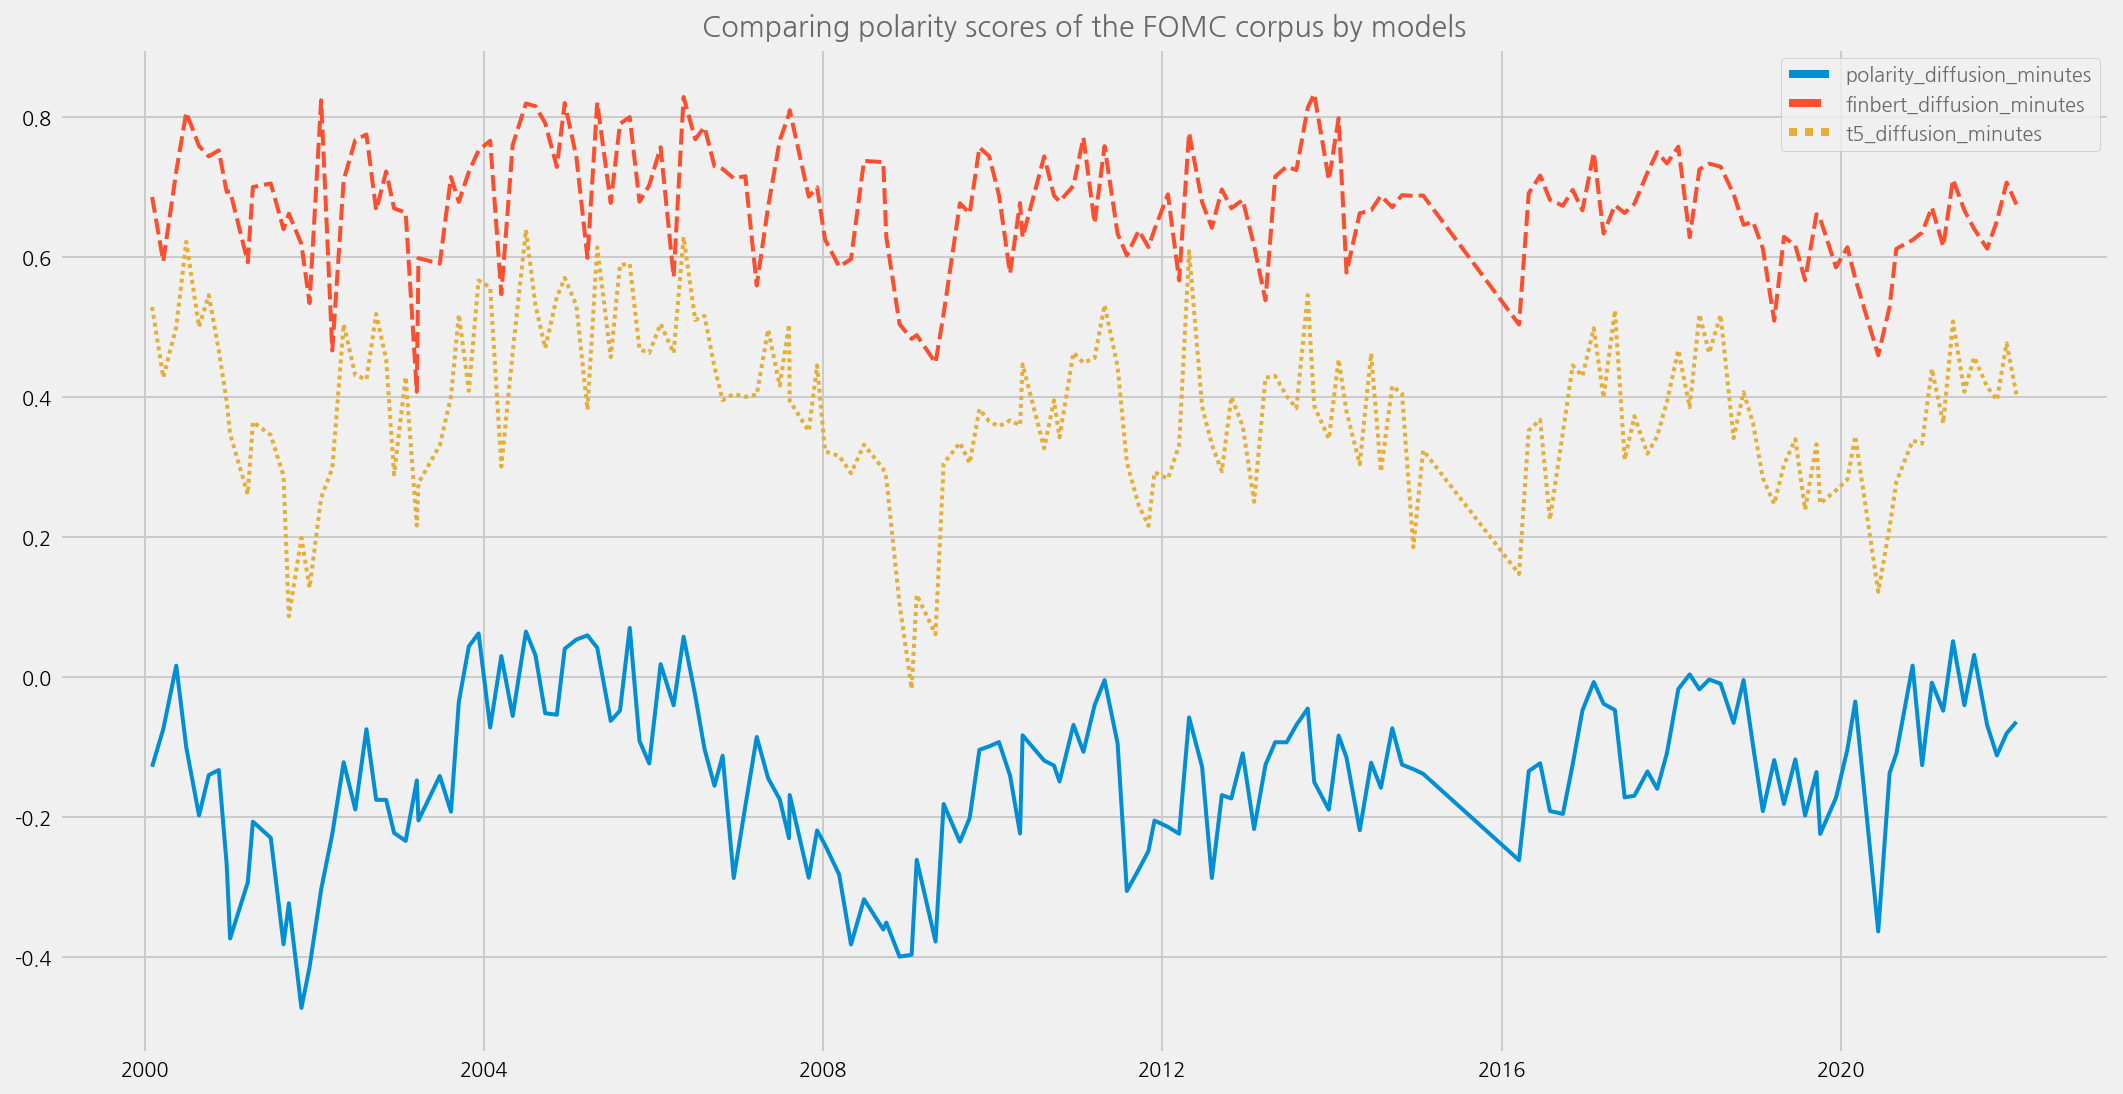

In [24]:
cfg = eKonf.compose('visualize/plot=lineplot')
cfg.plot.y = ['polarity_diffusion_minutes', 'finbert_diffusion_minutes', 't5_diffusion_minutes']
cfg.figure.figsize = '(15, 8)'
cfg.ax.title = 'Comparing polarity scores of the FOMC corpus by models'
eKonf.instantiate(cfg, data=merged_data_next)

### Plot the results and compare to the economical uncertainty / systemic risk periods

In [40]:
def plot_sentiments_over_crisis_periods(name='polarity_diffusion_statement', window=2):
    recessions = fomc.recessions.to_dict(orient="records")

    span_args = eKonf.compose("visualize/plot/ax/axvspan")
    annot_args = eKonf.compose("visualize/plot/ax/annotation")
    span_args.color = "crimson"
    span_args.alpha = 0.4

    spans = []
    annotations = []
    for span in recessions:
        annotation = span["name"]
        start = span["from_date"]
        end = span["to_date"]
        span = span_args.copy()
        span.xmin, span.xmax = eKonf.to_dateparm(start), eKonf.to_dateparm(end)

        x = start + (end - start) / 2
        y = -0.75
        annot = annot_args.copy()
        annot.text, annot.x, annot.y = annotation, eKonf.to_dateparm(x), y
        spans.append(span)
        annotations.append(annot)


    merged_data_next["polarity_ma"] = merged_data_next[name].rolling(window).mean()

    cfg = eKonf.compose("visualize/plot=lineplot")
    # cfg.figure.figsize = (15, 8)
    cfg.plot.x = "timestamp"
    cfg.plots.append(cfg.plot.copy())
    cfg.plots[0].y = "polarity_ma"
    cfg.plots[0].linewidth = 2.5
    cfg.plots[0].palette = "r"
    cfg.plots[1].y = name
    cfg.plots[1].linewidth = 1.5
    cfg.plots[1].palette = "g"
    cfg.ax.title = f"Polarity scores of {name}"
    cfg.ax.legend.labels = [
        f"{window} period MA",
        f"Polarity score of {name}",
    ]
    cfg.ax.axvspans = spans
    cfg.ax.annotations = annotations
    eKonf.instantiate(cfg, data=merged_data_next)        

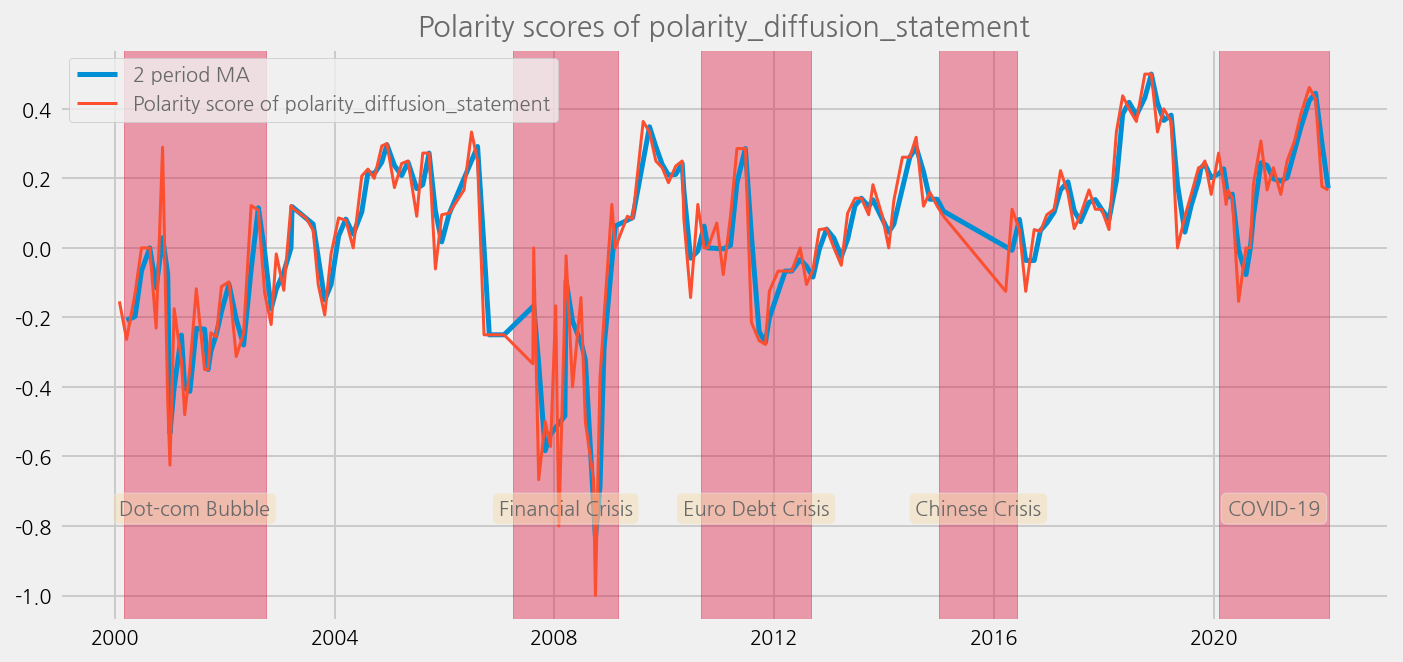

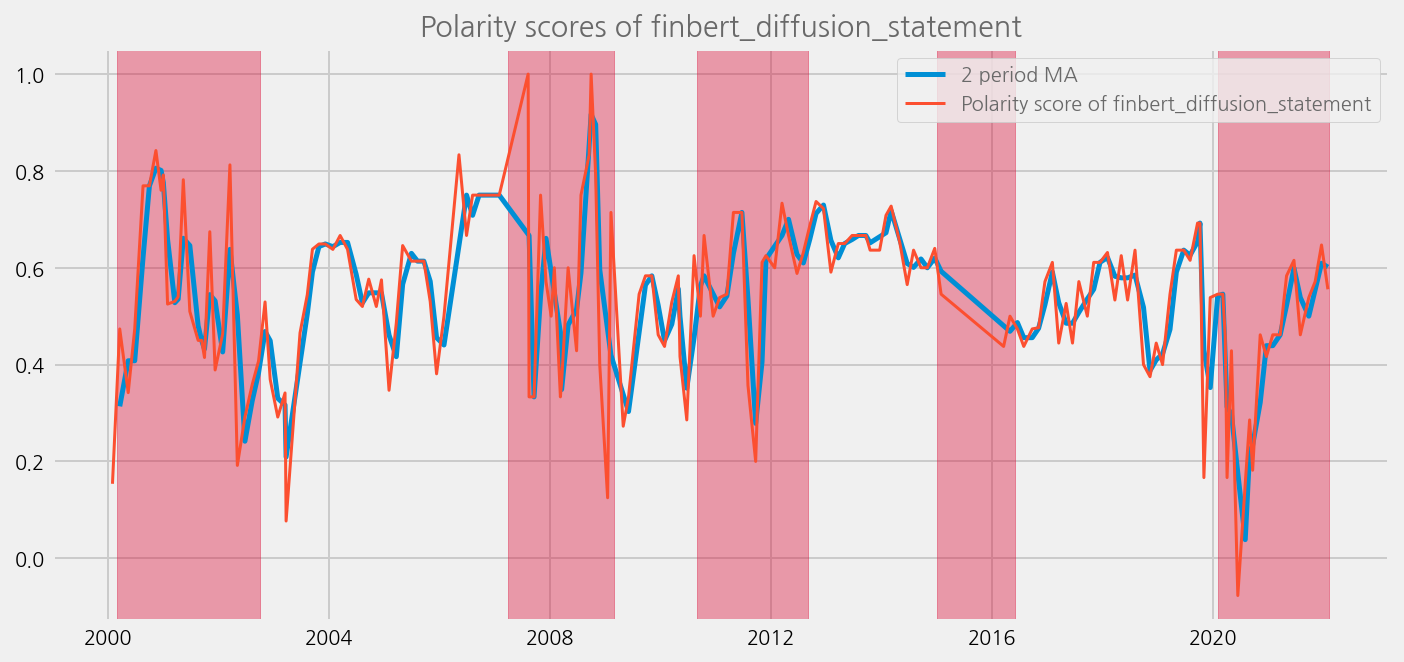

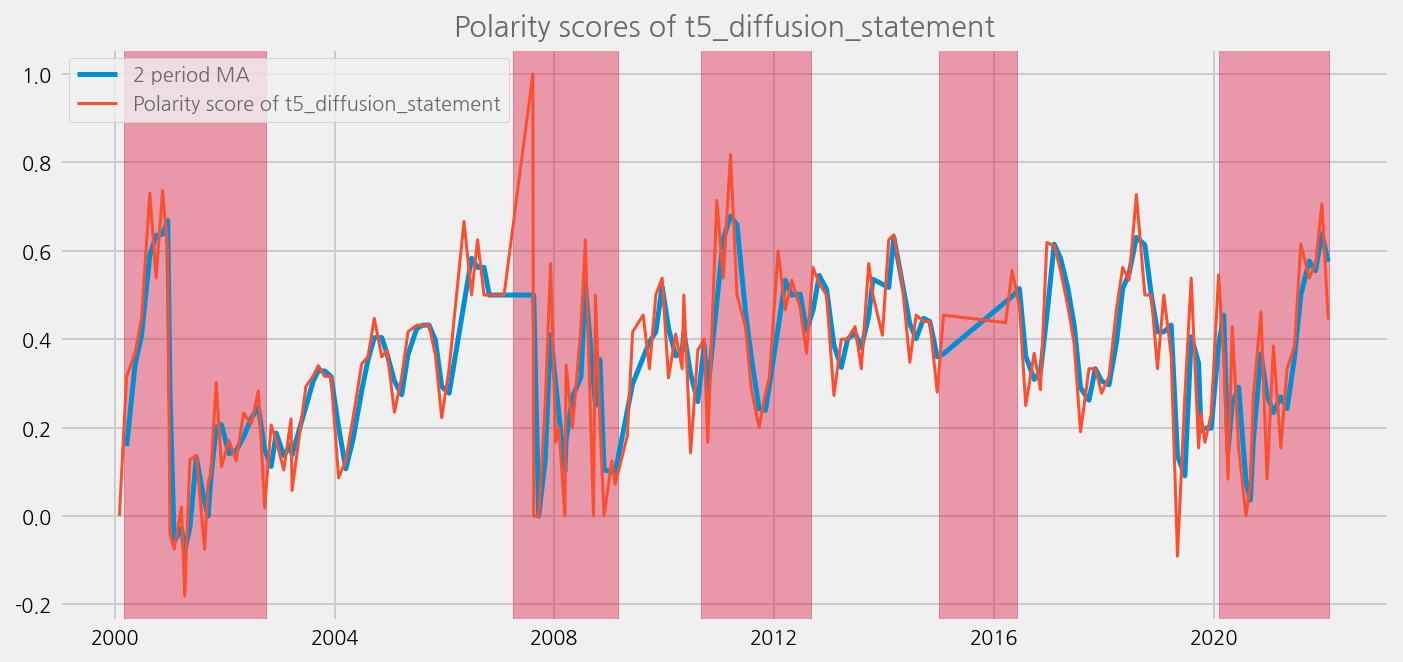

In [41]:
sentiments = ['polarity_diffusion_statement', 'finbert_diffusion_statement', 't5_diffusion_statement']
for name in sentiments:
    plot_sentiments_over_crisis_periods(name)

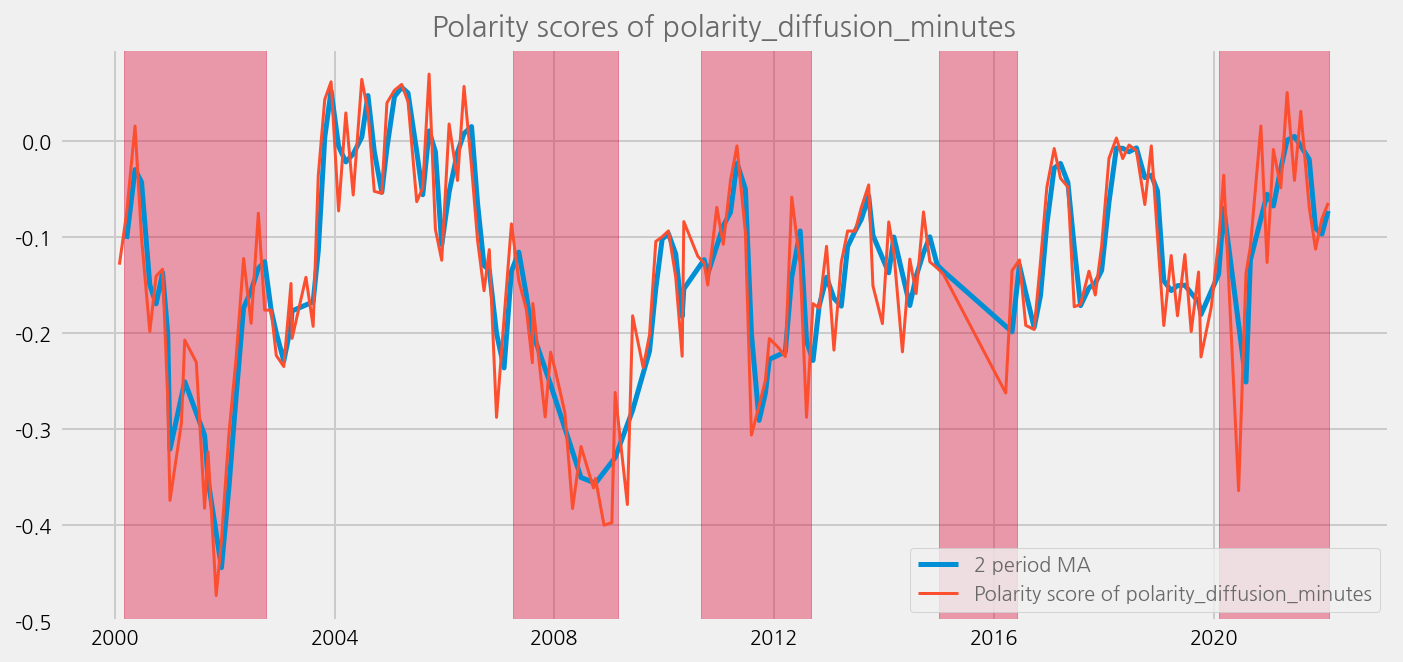

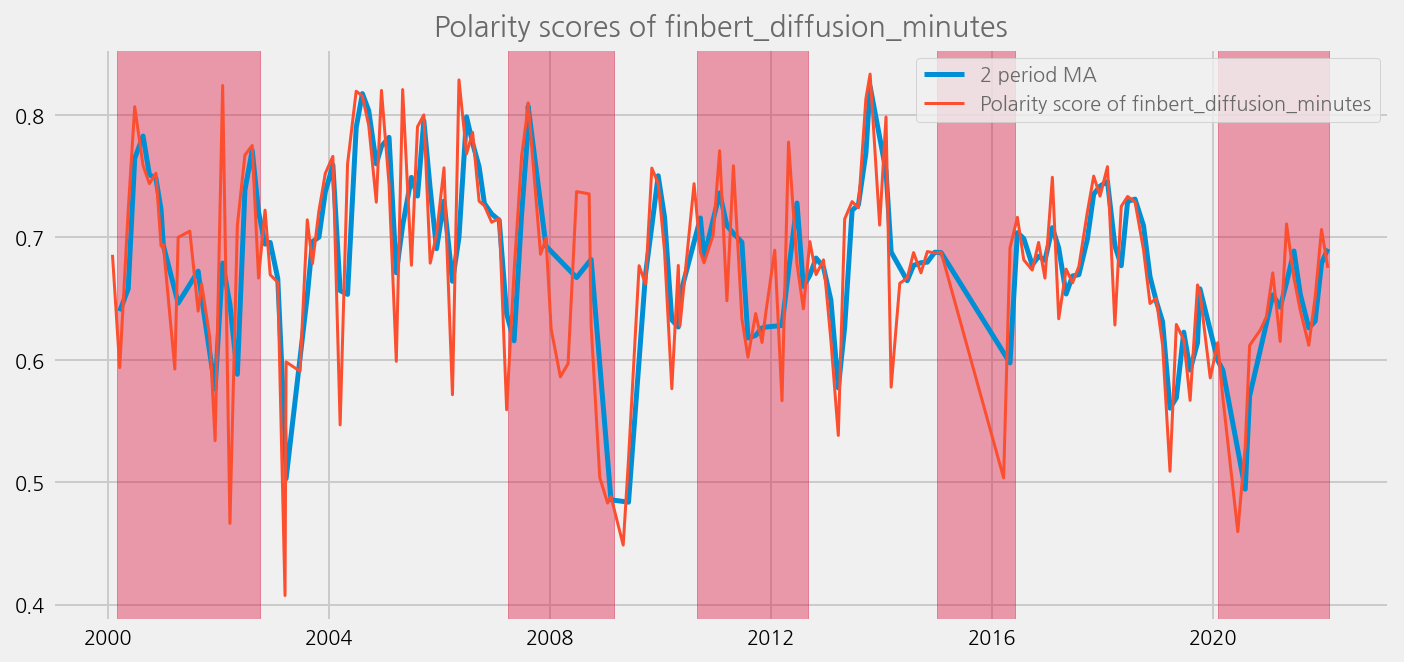

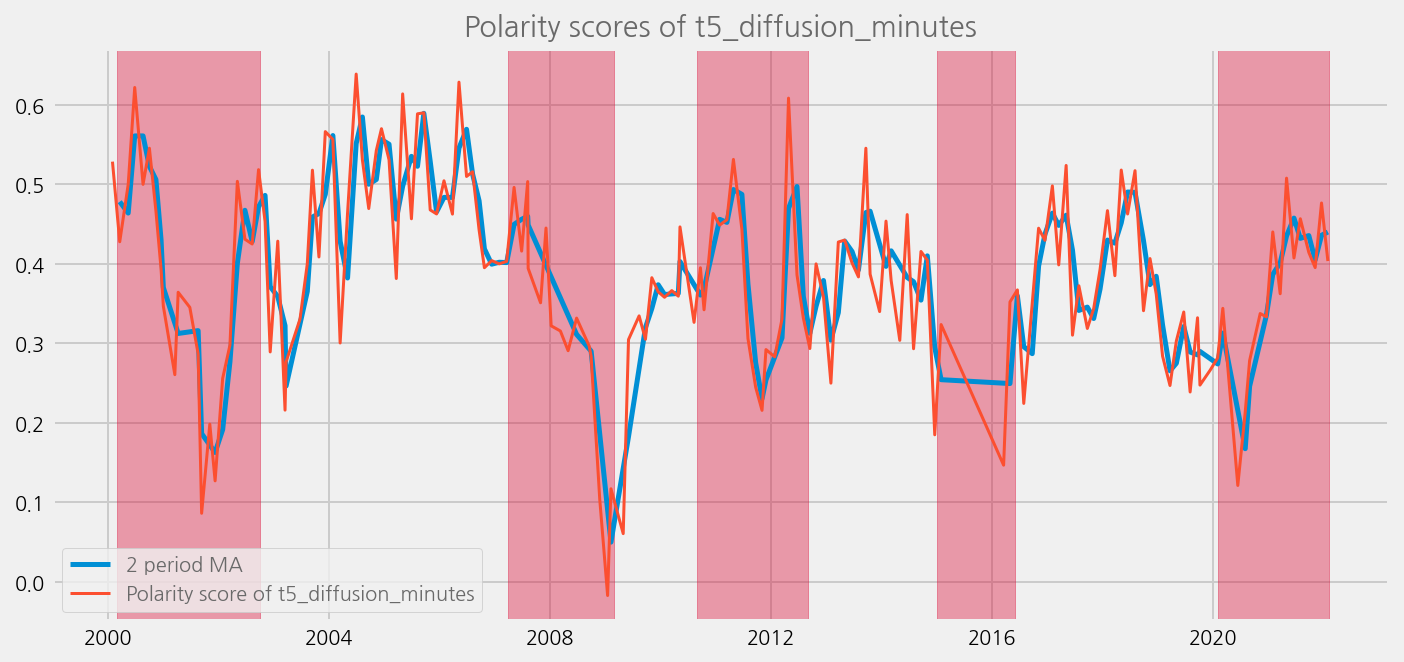

In [42]:
sentiments = ['polarity_diffusion_minutes', 'finbert_diffusion_minutes', 't5_diffusion_minutes']
for name in sentiments:
    plot_sentiments_over_crisis_periods(name)

In [43]:
from datetime import datetime

chair = fomc.chairpersons
chair = chair[chair.to_date.dt.year >= start_year]


def plot_sentiments_over_chair_periods(name='polarity_diffusion_statement', window=2):

    annot_args = eKonf.compose("visualize/plot/ax/annotation")

    spans = []
    annotations = []
    for row in chair.iterrows():
        row_num = row[0]
        start = row[1]["from_date"]
        if start.year < start_year:
            start = datetime(2000, 1, 1)
        end = row[1]["to_date"]
        annotation = row[1]["last_name"]
        color = "crimson" if row_num % 2 == 0 else "darkblue"
        alpha = 0.4 if row_num % 2 == 0 else 0.2
        span = {
            "xmin": eKonf.to_dateparm(start),
            "xmax": eKonf.to_dateparm(end),
            "alpha": alpha,
            "color": color,
        }

        x = start + (end - start) / 2
        y = -0.75
        annot = annot_args.copy()
        annot.text, annot.x, annot.y = annotation, eKonf.to_dateparm(x), y

        spans.append(span)
        annotations.append(annot)

        
    merged_data_next["polarity_ma"] = merged_data_next[name].rolling(window).mean()
        
    cfg = eKonf.compose("visualize/plot=lineplot")
    cfg.plot.x = "timestamp"
    ax2 = cfg.ax.copy()

    cfg.plots.append(cfg.plot.copy())
    cfg.plots[0].y = "polarity_ma"
    cfg.plots[0].rcParams = dict(linewidth=2.5, color="red")
    cfg.plots[1].y = name
    cfg.plots[1].rcParams = dict(linewidth=1.5, color="green")
    cfg.ax.title = f"Polarity scores of {name}"
    cfg.ax.legend = dict(
        labels=[
            f"{window} period MA",
            f"Polarity score of {name}",
        ],
        loc=2,
    )
    scatter_cfg = eKonf.compose("visualize/plot/scatterplot")
    scatter_cfg.y = "rate"
    scatter_cfg.secondary_y = True
    scatter_cfg.rcParams = dict(color="blue", alpha=0.8)
    cfg.plots.append(scatter_cfg)

    ax2.grid = False
    ax2.secondary_y = True
    ax2.ylim = "(-4, 10)"
    ax2.legend = dict(
        labels=["Fed Rate"],
        loc=1,
    )
    cfg.axes.append(ax2)
    cfg.ax.axvspans = spans
    cfg.ax.annotations = annotations

    eKonf.instantiate(cfg, data=merged_data_next)


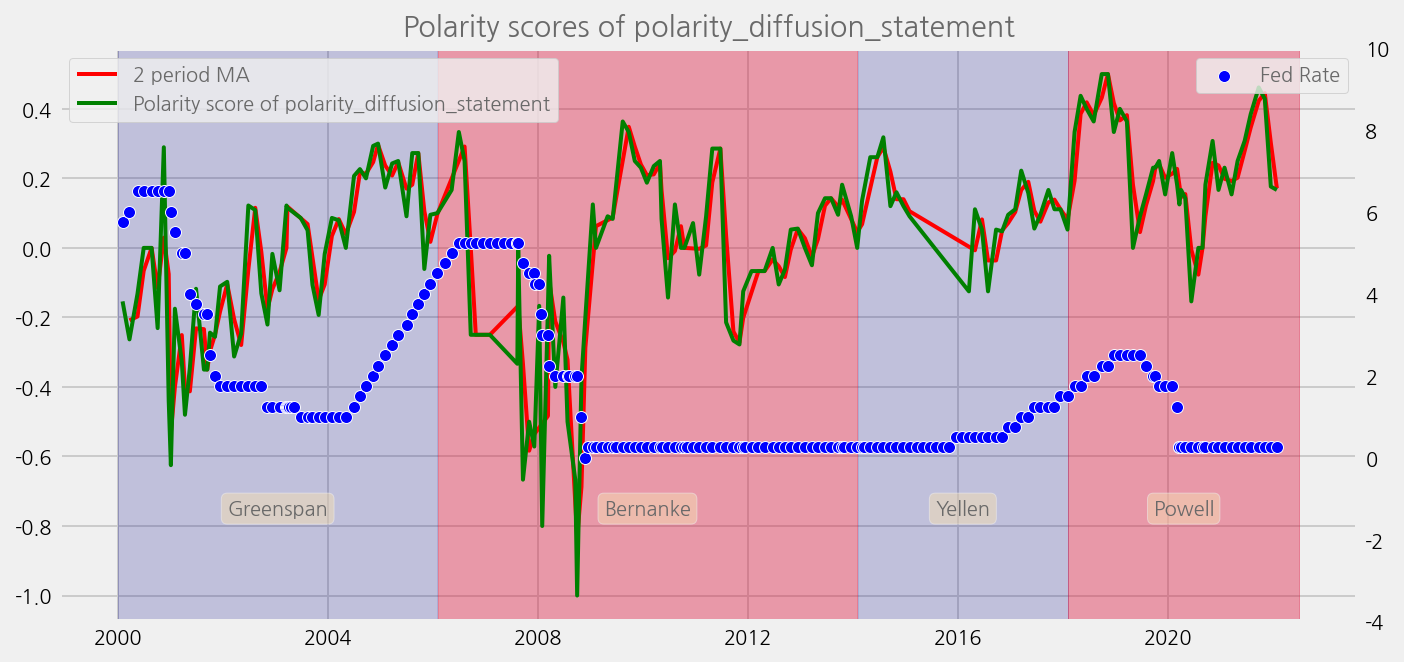

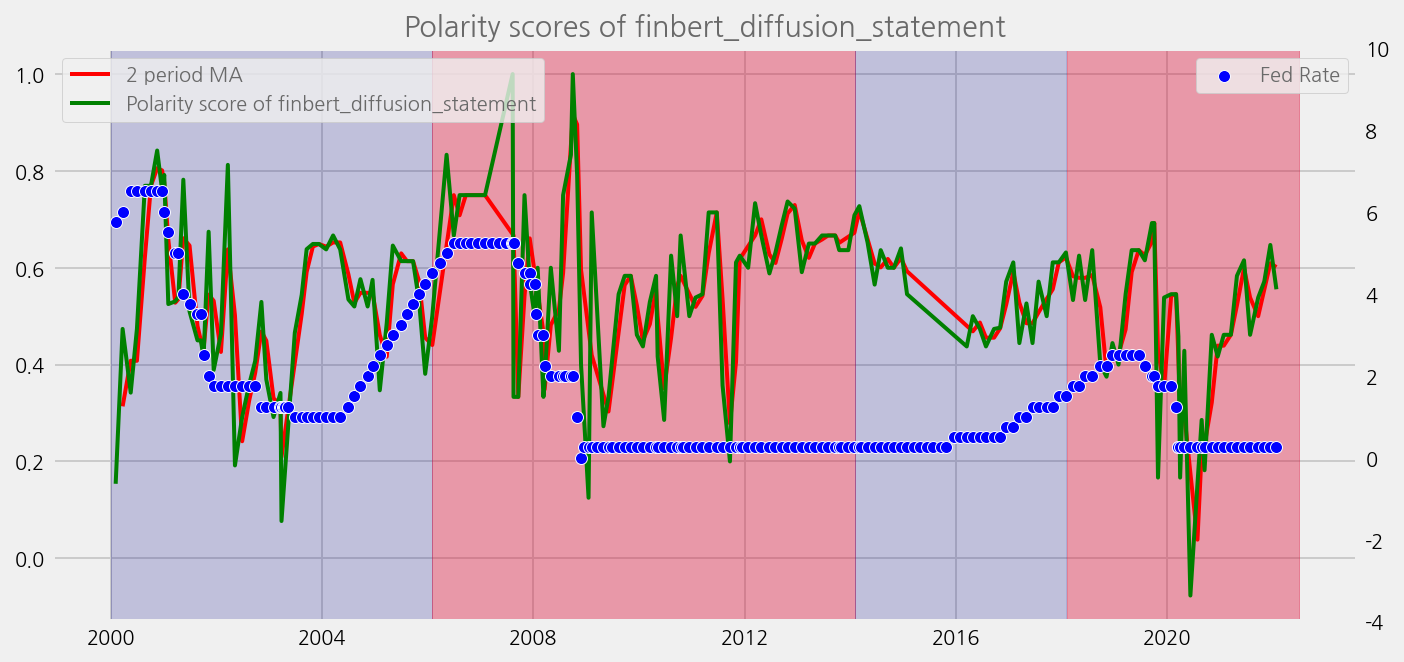

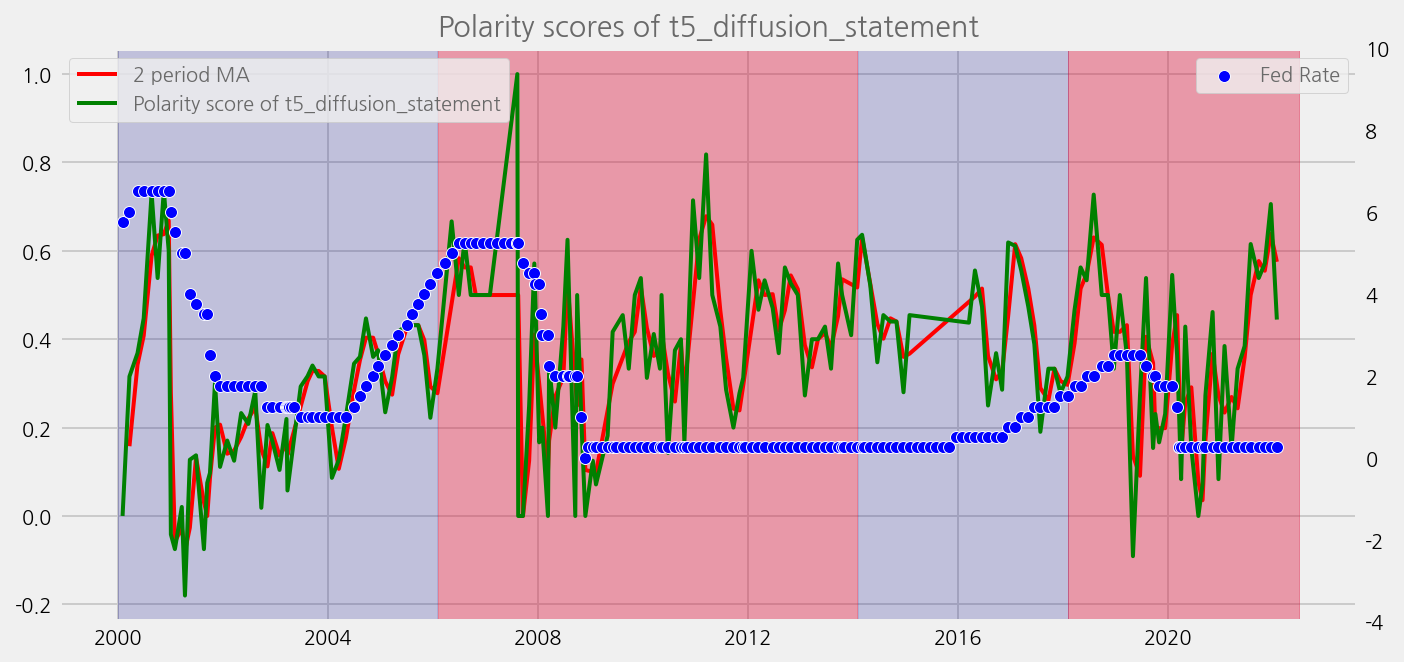

In [44]:
sentiments = ['polarity_diffusion_statement', 'finbert_diffusion_statement', 't5_diffusion_statement']
for name in sentiments:
    plot_sentiments_over_chair_periods(name)

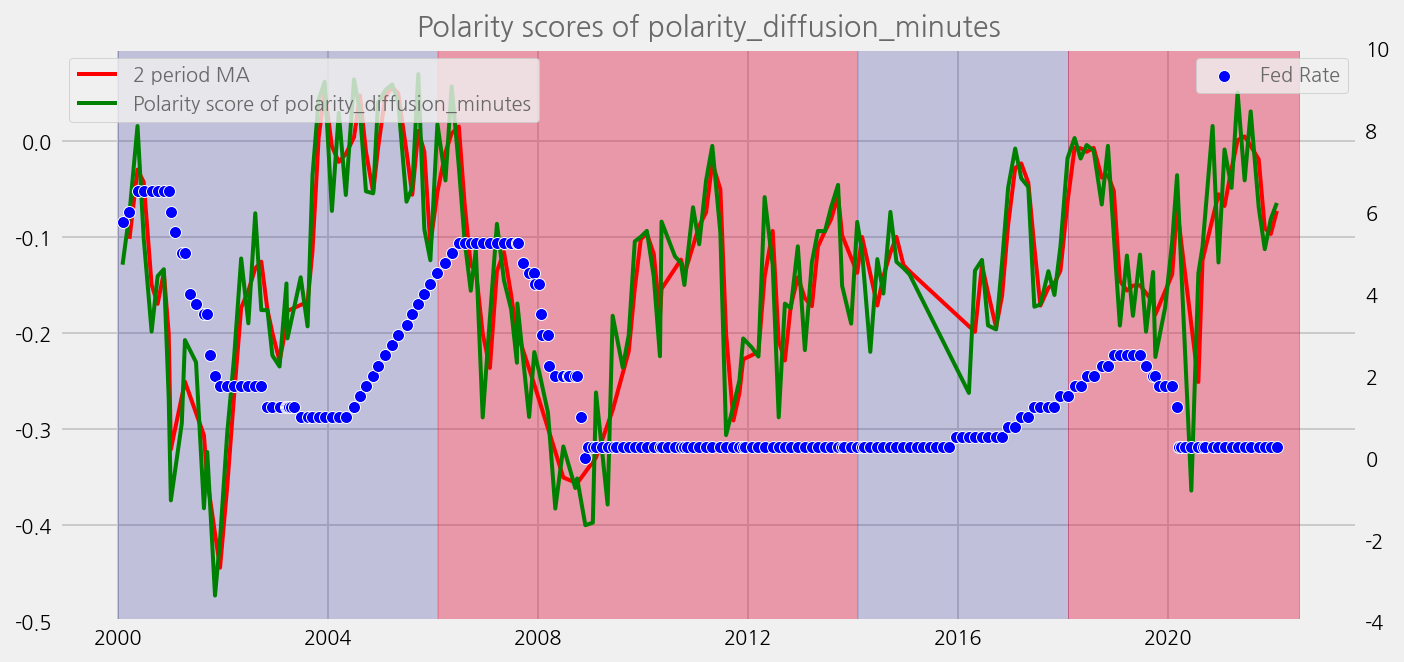

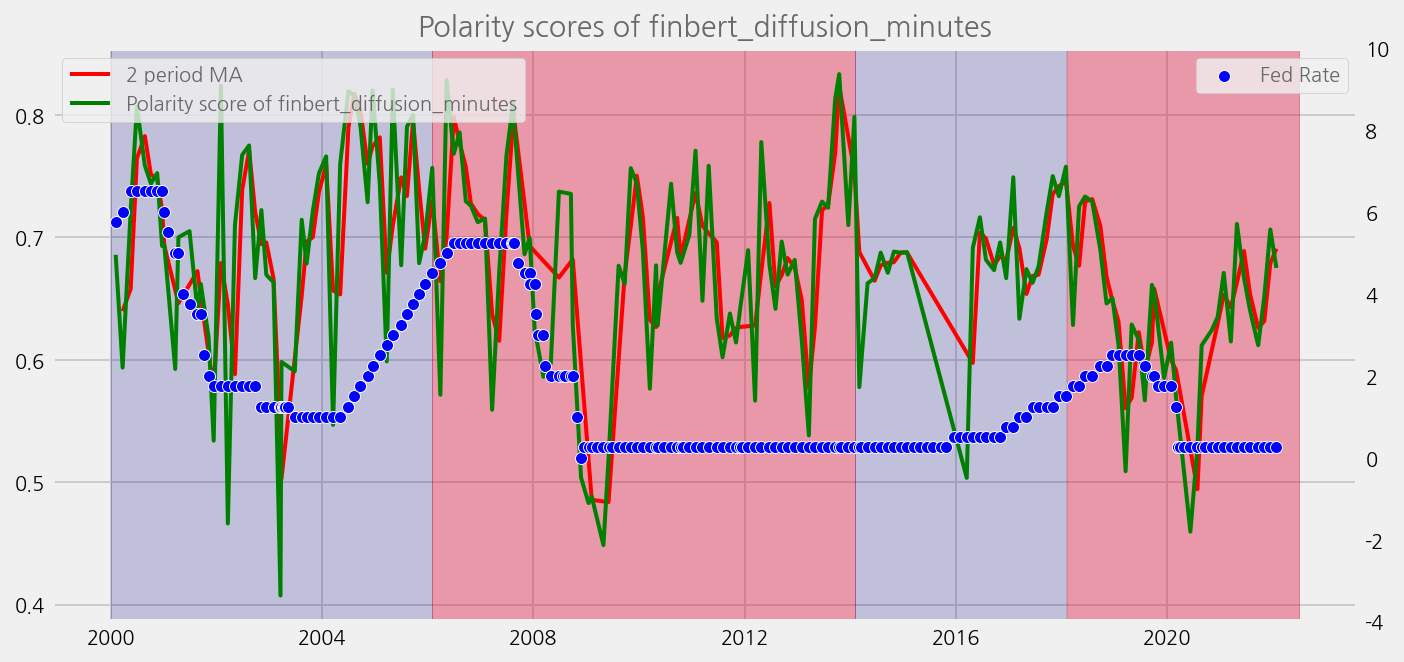

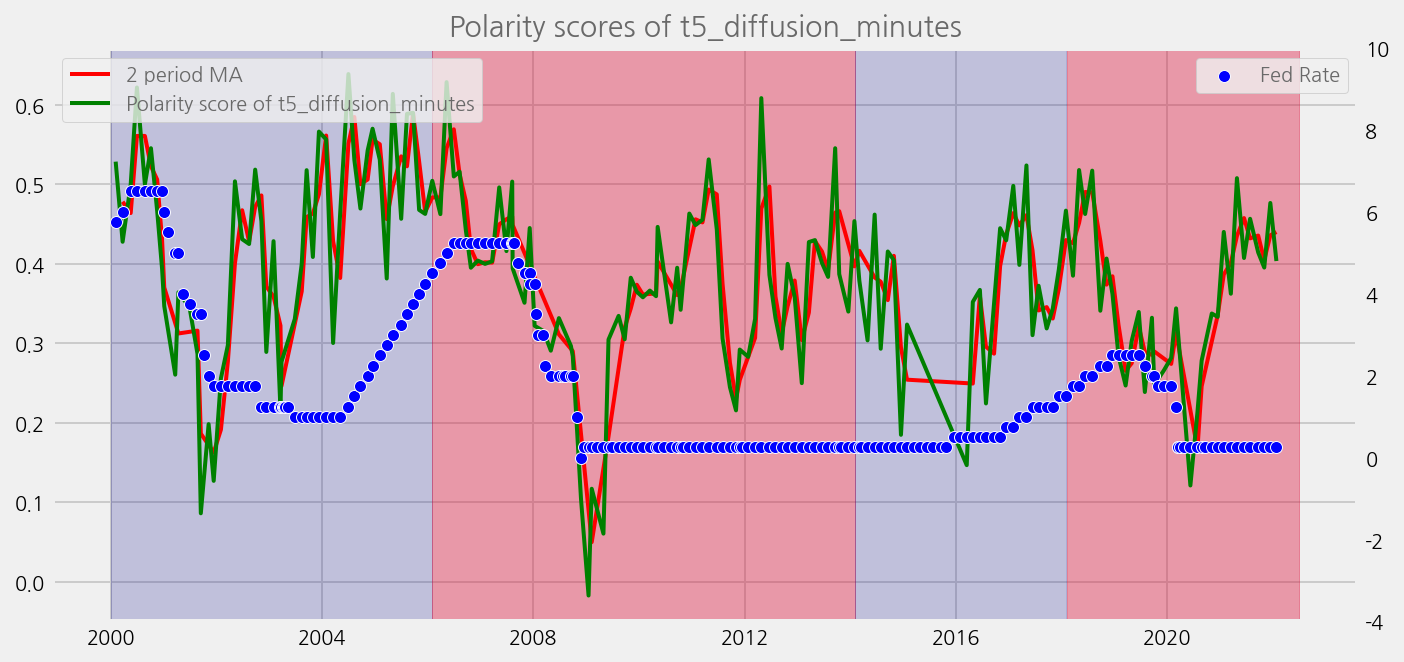

In [45]:
sentiments = ['polarity_diffusion_minutes', 'finbert_diffusion_minutes', 't5_diffusion_minutes']
for name in sentiments:
    plot_sentiments_over_chair_periods(name)